In [2]:
# Пакеты

# Standart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from functions import
import feature_selector

# Plotting
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

# Pandas
display_settings = {'max_columns': 500,
                    'expand_frame_repr': True,
                    'max_rows': 500,
                    'width': 1000,
                    'precision': 3,
                    'show_dimensions': True}
for op, value in display_settings.items():
    pd.set_option("display.{}".format(op), value)
    
del display_settings

ModuleNotFoundError: ignored

# Загрузка данных

## 1) Pays

In [0]:
pays = import_data('pays.csv', report=True)

Memory usage of dataframe is 207.14 MB
Memory usage after optimization is: 77.68 MB
Decreased by 62.5%


,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.602
1,0,0,5,2,399.600
2,0,0,7,2,79.600
3,0,0,9,2,239.600
4,0,0,12,2,79.600


Shape



(5430150, 5)


Types



hash_inn_kt      int32
hash_inn_dt      int32
week              int8
count            int16
sum            float32
Length: 5, dtype: object


NaN



hash_inn_kt       0
hash_inn_dt       0
week              0
count             0
sum            1125
Length: 5, dtype: int64

In [0]:
pays.head(30)

,hash_inn_kt,hash_inn_dt,week,count,sum
0,0,0,1,4,38399.602
1,0,0,5,2,399.600
2,0,0,7,2,79.600
3,0,0,9,2,239.600
4,0,0,12,2,79.600
5,0,0,15,2,399.600
6,0,0,16,2,0.920
7,0,0,20,4,2399.600
8,0,0,21,4,0.800
9,0,0,22,2,239.600


Заменим на 0 пропущенные значения

In [0]:
print(pays[pays['sum'].isnull()]['count'].unique())

pays['sum'].fillna(0, inplace=True)

[0]


Сагрегируем по месяцам

In [0]:
pays['month'] = pd.DatetimeIndex(pd.to_datetime(pays.week, unit="W")).month
pays.head(100)

,hash_inn_kt,hash_inn_dt,week,count,sum,month
0,0,0,1,4,38399.602,1
1,0,0,5,2,399.600,2
2,0,0,7,2,79.600,2
3,0,0,9,2,239.600,3
4,0,0,12,2,79.600,3
5,0,0,15,2,399.600,4
6,0,0,16,2,0.920,4
7,0,0,20,4,2399.600,5
8,0,0,21,4,0.800,5
9,0,0,22,2,239.600,6


In [0]:
pays_agg = pays.drop('week', axis=1)
pays.head()

,hash_inn_kt,hash_inn_dt,week,count,sum,month
0,0,0,1,4,38399.602,1
1,0,0,5,2,399.600,2
2,0,0,7,2,79.600,2
3,0,0,9,2,239.600,3
4,0,0,12,2,79.600,3


In [0]:
pays_agg = pays_agg.groupby(["hash_inn_kt", "hash_inn_dt", "month"], as_index=False).agg('sum')

In [0]:
pays_agg.shape

(3552097, 5)

## 2) Info

In [0]:
info = import_data('inn_info_public.csv', report=True)

Memory usage of dataframe is 5.72 MB
Memory usage after optimization is: 1.60 MB
Decreased by 72.0%


,hash_inn,okved2,region,is_public
0,61058,34,86,True
1,8311,18,86,True
2,130273,-1,86,False
3,64081,43,86,True
4,218005,12,86,True


Shape



(240069, 4)


Types



hash_inn     int32
okved2        int8
region        int8
is_public     bool
Length: 4, dtype: object


NaN
-


# Разведочный анализ

In [0]:
import pandas_profiling as pdprof

In [0]:
info.region.nunique()

91

В нашем датасете 91 различный регион

In [0]:
#В jupyter nb при повторном запуске файла отчет может отображаться некорректно, лучше смотреть в colab
info.profile_report()

Классы не сбалансированы, оквэд 12 занимает значительную долю среди всех наблюдений

# Feature Enjeneering

In [0]:
col_lst = ['hash_inn_kt',
           'hash_inn_dt',
           'week',
           'count',
           'sum',
           'okved2_k',
           'okved2_d',
           'region_k',
           'region_d']

st_data_week = pays.merge(info,
                     left_on='hash_inn_kt',
                     right_on='hash_inn')\
            .merge(info,
                   left_on='hash_inn_dt',
                   right_on='hash_inn',
                   suffixes=('_k', '_d'))[col_lst]

In [0]:
st_data = pays_agg.merge(info,
                     left_on='hash_inn_kt',
                     right_on='hash_inn')\
                  .merge(info,
                   left_on='hash_inn_dt',
                   right_on='hash_inn',
                   suffixes=('_k', '_d')).drop(['hash_inn_k','hash_inn_d'], axis=1)

st_data.head(30)

,hash_inn_kt,hash_inn_dt,month,count,sum,okved2_k,region_k,is_public_k,okved2_d,region_d,is_public_d
0,0,0,1,4,38399.602,-1,84,False,-1,84,False
1,0,0,2,4,479.200,-1,84,False,-1,84,False
2,0,0,3,4,319.200,-1,84,False,-1,84,False
3,0,0,4,4,400.520,-1,84,False,-1,84,False
4,0,0,5,8,2400.400,-1,84,False,-1,84,False
5,0,0,6,2,239.600,-1,84,False,-1,84,False
6,2443,0,3,2,42.080,29,84,True,-1,84,False
7,5121,0,1,2,353.440,-1,60,False,-1,84,False
8,5121,0,2,12,626.524,-1,60,False,-1,84,False
9,5121,0,5,6,521.352,-1,60,False,-1,84,False


In [0]:
print(st_data.shape,pays_agg.shape)

(3552095, 11) (3552097, 5)


In [0]:
inn_lst = info[['hash_inn', 'okved2', 'region', 'is_public']]
print(inn_lst.shape)
len(inn_lst.hash_inn.unique())

(240069, 4)


240069

In [0]:
#в df_kt Каждому инну соответветствует информация о том кому фирма посылала деньги (здесь инн - кредитор)
df_kt = inn_lst.merge(st_data, left_on='hash_inn', right_on='hash_inn_kt', how="outer")\
                    .drop(['hash_inn_kt', 'is_public_k', 'okved2_k','region_k'], axis=1)
print(df_kt.shape)
print(len(df_kt.hash_inn.unique()))
df_kt['sum'].fillna(0, inplace=True)
df_kt['count'].fillna(0, inplace=True)
df_kt.head()

(3640004, 11)
240069


,hash_inn,okved2,region,is_public,hash_inn_dt,month,count,sum,okved2_d,region_d,is_public_d
0,61058,34,86,True,NaN,NaN,0.0,0.000,NaN,NaN,NaN
1,8311,18,86,True,NaN,NaN,0.0,0.000,NaN,NaN,NaN
2,130273,-1,86,False,185697.0,1.0,4.0,611.200,61.0,84.0,True
3,64081,43,86,True,NaN,NaN,0.0,0.000,NaN,NaN,NaN
4,218005,12,86,True,74777.0,2.0,17.0,731.272,-1.0,84.0,False


In [0]:
#в df_dt Каждому инну соответветствует информация о том от кого фирма принимала деньги (здесь инн - дебитор)
df_dt = inn_lst.merge(st_data, left_on='hash_inn', right_on='hash_inn_dt', how="outer")\
                    .drop(['hash_inn_dt', 'is_public_d', 'okved2_d','region_d'], axis=1)
print(df_dt.shape)
print(len(df_dt.hash_inn.unique()))
df_dt.head()

(3602394, 11)
240069


,hash_inn,okved2,region,is_public,hash_inn_kt,month,count,sum,okved2_k,region_k,is_public_k
0,61058,34,86,True,112640.0,1.0,3.0,43.504,-1.0,86.0,False
1,61058,34,86,True,112640.0,2.0,3.0,18.768,-1.0,86.0,False
2,61058,34,86,True,112640.0,3.0,3.0,16.440,-1.0,86.0,False
3,61058,34,86,True,112640.0,4.0,3.0,10.744,-1.0,86.0,False
4,8311,18,86,True,201065.0,1.0,3.0,13.220,-1.0,84.0,False


In [0]:
#Сводная таблица для оттоков по месяцам
piv_m_kt = pd.pivot_table(df_kt,
                              index="hash_inn",
                              columns=['month'],
                              values=['sum','count'],
                              aggfunc=np.sum,
                              margins=True,
                              dropna=False)
print(piv_m_kt.shape)
piv_m_kt.head()

(152161, 14)


count                                              sum                                                                  
month      1.0   2.0   3.0   4.0   5.0   6.0    All         1.0        2.0        3.0        4.0       5.0        6.0         All
hash_inn                                                                                                                         
0         39.0  31.0  46.0  40.0  26.0  12.0  194.0  115102.688  48101.887  42611.773  12431.672  23724.66  11547.904  253520.594
1          NaN   6.0   6.0   2.0   NaN   NaN   14.0         NaN     37.200     75.600     25.200       NaN        NaN     138.000
2          4.0   NaN   1.0   NaN   NaN   NaN    5.0      30.500        NaN      5.740        NaN       NaN        NaN      36.240
3          NaN   NaN   NaN   1.0   NaN   NaN    1.0         NaN        NaN        NaN     13.948       NaN        NaN      13.948
4          NaN   5.0   3.0   5.0   3.0   2.0   18.0         NaN      2.580      1.320      4.520      0.56      1.180      10.160

[5 rows x 14 columns]

In [0]:
#flatten
piv_m_kt.columns = [ '_kt_month'.join([str(c) for c in c_list]) for c_list in piv_m_kt.columns.values ]
print(piv_m_kt.shape)
piv_m_kt.head(20)

(152161, 14)


,count_kt_month1.0,count_kt_month2.0,count_kt_month3.0,count_kt_month4.0,count_kt_month5.0,count_kt_month6.0,count_kt_monthAll,sum_kt_month1.0,sum_kt_month2.0,sum_kt_month3.0,sum_kt_month4.0,sum_kt_month5.0,sum_kt_month6.0,sum_kt_monthAll
hash_inn,,,,,,,,,,,,,,
0,39.0,31.0,46.0,40.0,26.0,12.0,194.0,115102.688,48101.887,42611.773,12431.672,23724.660,11547.904,253520.594
1,NaN,6.0,6.0,2.0,NaN,NaN,14.0,NaN,37.200,75.600,25.200,NaN,NaN,138.000
2,4.0,NaN,1.0,NaN,NaN,NaN,5.0,30.500,NaN,5.740,NaN,NaN,NaN,36.240
3,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,13.948,NaN,NaN,13.948
4,NaN,5.0,3.0,5.0,3.0,2.0,18.0,NaN,2.580,1.320,4.520,0.560,1.180,10.160
5,7.0,12.0,8.0,12.0,4.0,3.0,46.0,82.140,57.800,27.700,77.608,13.672,38.000,296.920
6,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,8.800,NaN,8.800
7,36.0,21.0,20.0,32.0,22.0,9.0,140.0,7731.724,4935.552,5668.344,7920.016,5254.656,2031.276,33541.566
8,10.0,6.0,6.0,8.0,10.0,NaN,40.0,949.544,636.720,432.828,1093.372,508.416,NaN,3620.880


In [0]:
#Сводная таблица для притоков по месяцам
piv_m_dt = pd.pivot_table(df_dt,
                              index="hash_inn",
                              columns=['month'],
                              values=['sum','count'],
                              aggfunc=np.sum,
                              margins=True)
piv_m_dt.columns = [ '_dt_month'.join([str(c) for c in c_list]) for c_list in piv_m_dt.columns.values ]
print(piv_m_dt.shape)
piv_m_dt.head(20)

(189771, 14)


,count_dt_month1.0,count_dt_month2.0,count_dt_month3.0,count_dt_month4.0,count_dt_month5.0,count_dt_month6.0,count_dt_monthAll,sum_dt_month1.0,sum_dt_month2.0,sum_dt_month3.0,sum_dt_month4.0,sum_dt_month5.0,sum_dt_month6.0,sum_dt_monthAll
hash_inn,,,,,,,,,,,,,,
0,126.0,195.0,202.0,241.0,244.0,69.0,1077.0,47808.363,15049.196,66528.375,24023.928,15402.244,3214.008,172026.109
2,5.0,5.0,9.0,4.0,3.0,3.0,29.0,20.164,23.792,210.372,61.408,62.872,48.876,427.484
5,8.0,8.0,10.0,6.0,6.0,NaN,38.0,31.948,34.020,24.820,15.940,15.940,NaN,122.668
7,7.0,7.0,NaN,NaN,3.0,NaN,17.0,2509.212,5174.728,NaN,NaN,125.176,NaN,7809.116
10,22.0,23.0,NaN,13.0,12.0,2.0,72.0,35.144,27.360,NaN,22.400,14.880,52.832,152.616
11,NaN,NaN,6.0,NaN,3.0,NaN,9.0,NaN,NaN,343.000,NaN,168.800,NaN,511.800
13,NaN,NaN,NaN,3.0,2.0,3.0,8.0,NaN,NaN,NaN,304.900,254.232,509.152,1068.284
15,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.640,NaN,NaN,NaN,2.640
16,4.0,4.0,6.0,2.0,4.0,2.0,22.0,27.648,18.856,10.776,8.428,20.644,7.644,93.996


In [0]:
#автоматизируем генерацию сводных таблиц и уберем суммирование
def piv_maker(data, col, sep):
    piv_df = pd.pivot_table(data,
                              index="hash_inn",
                              columns=col,
                              values=['sum','count'],
                              aggfunc=np.sum,
                              margins=False)
    piv_df.columns = [ sep.join([str(c) for c in c_list]) for c_list in piv_df.columns.values ]
    piv_df.fillna(0,inplace=True)
    return piv_df

In [0]:
#Добавим фактор cashflow с детализацией по месяцам
#piv_month_cashflow = piv_maker(df_dt, 'month', '_m_cashlow') - piv_maker(df_kt, 'month', '_m_cashlow')

In [0]:
#Промежуточные сводные таблицы по оквэдам и регионам:
# 1) В этой таблице будут данные о оквэдах которые кредитует каждый инн (данные о оквэдах - дебиторах)
piv_okved_dt = piv_maker(df_kt, 'okved2_d', '_dt_okved')
print(piv_okved_dt.shape)
# 2) В этой таблице данные о оквэдах у которых берет деньги каждый инн (данные о оквэдах - кредиторах)
piv_okved_kt = piv_maker(df_dt, 'okved2_k', '_kt_okved')
print(piv_okved_kt.shape)
#Тот же смысл для таблиц ниже (только по регионам)
piv_reg_dt = piv_maker(df_kt, 'region_d', '_dt_region')
piv_reg_kt = piv_maker(df_dt, 'region_k', '_kt_region')

(152160, 162)
(189770, 162)


In [0]:
#Cashflow(эти факторы вошли в df_fullv3.txt, df_fullv2.txt был создан без них, и к нему также были применены дальнейшие шаги с отбором факторов)
#piv_okved_cashflow = piv_maker(df_dt, 'okved2_k', '_okved_cashflow') - piv_maker(df_kt, 'okved2_d', '_okved_cashflow')
#piv_reg_cashflow = piv_maker(df_dt, 'region_k', '_reg_cashflow') - piv_maker(df_kt, 'region_d', '_reg_cashflow')

In [0]:
#Собираем в один df
df_full = inn_lst.merge(piv_m_kt, left_on='hash_inn', right_index=True, how="left")\
            .merge(piv_m_dt, left_on='hash_inn', right_index=True, how="left")\
            .merge(piv_okved_kt, left_on='hash_inn', right_index=True, how="left")\
            .merge(piv_okved_dt, left_on='hash_inn', right_index=True, how="left")\
            .merge(piv_reg_kt, left_on='hash_inn', right_index=True, how="left")\
            #.merge(piv_month_cashflow, left_on='hash_inn', right_index=True, how="left")\
            #.merge(piv_okved_cashflow, left_on='hash_inn', right_index=True, how="left")\
            #.merge(piv_reg_cashflow, left_on='hash_inn', right_index=True, how="left")\
            .merge(piv_reg_dt, left_on='hash_inn', right_index=True, how="left")\
print(df_full.shape)
df_full.head()

(240069, 1070)


,hash_inn,okved2,region,is_public,count_kt_month1.0,count_kt_month2.0,count_kt_month3.0,count_kt_month4.0,count_kt_month5.0,count_kt_month6.0,count_kt_monthAll,sum_kt_month1.0,sum_kt_month2.0,sum_kt_month3.0,sum_kt_month4.0,sum_kt_month5.0,sum_kt_month6.0,sum_kt_monthAll,count_dt_month1.0,count_dt_month2.0,count_dt_month3.0,count_dt_month4.0,count_dt_month5.0,count_dt_month6.0,count_dt_monthAll,sum_dt_month1.0,sum_dt_month2.0,sum_dt_month3.0,sum_dt_month4.0,sum_dt_month5.0,sum_dt_month6.0,sum_dt_monthAll,count_kt_okved-1.0,count_kt_okved0.0,count_kt_okved1.0,count_kt_okved2.0,count_kt_okved3.0,count_kt_okved4.0,count_kt_okved5.0,count_kt_okved6.0,count_kt_okved7.0,count_kt_okved8.0,count_kt_okved9.0,count_kt_okved10.0,count_kt_okved11.0,count_kt_okved12.0,count_kt_okved13.0,count_kt_okved14.0,count_kt_okved15.0,count_kt_okved16.0,count_kt_okved17.0,count_kt_okved18.0,count_kt_okved19.0,count_kt_okved20.0,count_kt_okved21.0,count_kt_okved22.0,count_kt_okved23.0,count_kt_okved24.0,count_kt_okved25.0,count_kt_okved26.0,count_kt_okved27.0,count_kt_okved28.0,count_kt_okved29.0,count_kt_okved30.0,count_kt_okved31.0,count_kt_okved32.0,count_kt_okved33.0,count_kt_okved34.0,count_kt_okved35.0,count_kt_okved36.0,count_kt_okved37.0,count_kt_okved38.0,count_kt_okved39.0,count_kt_okved40.0,count_kt_okved41.0,count_kt_okved42.0,count_kt_okved43.0,count_kt_okved44.0,count_kt_okved45.0,count_kt_okved46.0,count_kt_okved47.0,count_kt_okved48.0,count_kt_okved49.0,count_kt_okved50.0,count_kt_okved51.0,count_kt_okved52.0,count_kt_okved53.0,count_kt_okved54.0,count_kt_okved55.0,count_kt_okved56.0,count_kt_okved57.0,count_kt_okved58.0,count_kt_okved59.0,count_kt_okved60.0,count_kt_okved61.0,count_kt_okved62.0,count_kt_okved63.0,count_kt_okved64.0,count_kt_okved65.0,count_kt_okved66.0,count_kt_okved67.0,count_kt_okved68.0,count_kt_okved69.0,count_kt_okved70.0,count_kt_okved71.0,count_kt_okved72.0,count_kt_okved73.0,count_kt_okved74.0,count_kt_okved75.0,count_kt_okved76.0,count_kt_okved77.0,count_kt_okved78.0,count_kt_okved79.0,sum_kt_okved-1.0,sum_kt_okved0.0,sum_kt_okved1.0,sum_kt_okved2.0,sum_kt_okved3.0,sum_kt_okved4.0,sum_kt_okved5.0,sum_kt_okved6.0,sum_kt_okved7.0,sum_kt_okved8.0,sum_kt_okved9.0,sum_kt_okved10.0,sum_kt_okved11.0,sum_kt_okved12.0,sum_kt_okved13.0,sum_kt_okved14.0,sum_kt_okved15.0,sum_kt_okved16.0,sum_kt_okved17.0,sum_kt_okved18.0,sum_kt_okved19.0,sum_kt_okved20.0,sum_kt_okved21.0,sum_kt_okved22.0,sum_kt_okved23.0,sum_kt_okved24.0,sum_kt_okved25.0,sum_kt_okved26.0,sum_kt_okved27.0,sum_kt_okved28.0,sum_kt_okved29.0,sum_kt_okved30.0,sum_kt_okved31.0,sum_kt_okved32.0,sum_kt_okved33.0,sum_kt_okved34.0,sum_kt_okved35.0,sum_kt_okved36.0,sum_kt_okved37.0,sum_kt_okved38.0,sum_kt_okved39.0,sum_kt_okved40.0,sum_kt_okved41.0,sum_kt_okved42.0,sum_kt_okved43.0,sum_kt_okved44.0,sum_kt_okved45.0,sum_kt_okved46.0,sum_kt_okved47.0,sum_kt_okved48.0,sum_kt_okved49.0,sum_kt_okved50.0,sum_kt_okved51.0,sum_kt_okved52.0,sum_kt_okved53.0,sum_kt_okved54.0,sum_kt_okved55.0,sum_kt_okved56.0,sum_kt_okved57.0,sum_kt_okved58.0,sum_kt_okved59.0,sum_kt_okved60.0,sum_kt_okved61.0,sum_kt_okved62.0,sum_kt_okved63.0,sum_kt_okved64.0,sum_kt_okved65.0,sum_kt_okved66.0,sum_kt_okved67.0,sum_kt_okved68.0,sum_kt_okved69.0,sum_kt_okved70.0,sum_kt_okved71.0,sum_kt_okved72.0,sum_kt_okved73.0,sum_kt_okved74.0,sum_kt_okved75.0,sum_kt_okved76.0,sum_kt_okved77.0,sum_kt_okved78.0,sum_kt_okved79.0,count_dt_okved-1.0,count_dt_okved0.0,count_dt_okved1.0,count_dt_okved2.0,count_dt_okved3.0,count_dt_okved4.0,count_dt_okved5.0,count_dt_okved6.0,count_dt_okved7.0,count_dt_okved8.0,count_dt_okved9.0,count_dt_okved10.0,count_dt_okved11.0,count_dt_okved12.0,count_dt_okved13.0,count_dt_okved14.0,count_dt_okved15.0,count_dt_okved16.0,count_dt_okved17.0,count_dt_okved18.0,count_dt_okved19.0,count_dt_okved20.0,count_dt_okved21.0,count_dt_okved22.0,count_dt_okved23.0,count_dt_okved24.0,count_dt_okved25.0,count_dt_okved26.0,count_dt_okved27.0,count_dt_okved28.0,count_dt_okved29.0,count_dt_okved3

In [0]:
df_full.fillna(0, inplace=True)
df_full.head()

,hash_inn,okved2,region,is_public,count_kt_month1.0,count_kt_month2.0,count_kt_month3.0,count_kt_month4.0,count_kt_month5.0,count_kt_month6.0,count_kt_monthAll,sum_kt_month1.0,sum_kt_month2.0,sum_kt_month3.0,sum_kt_month4.0,sum_kt_month5.0,sum_kt_month6.0,sum_kt_monthAll,count_dt_month1.0,count_dt_month2.0,count_dt_month3.0,count_dt_month4.0,count_dt_month5.0,count_dt_month6.0,count_dt_monthAll,sum_dt_month1.0,sum_dt_month2.0,sum_dt_month3.0,sum_dt_month4.0,sum_dt_month5.0,sum_dt_month6.0,sum_dt_monthAll,count_kt_okved-1.0,count_kt_okved0.0,count_kt_okved1.0,count_kt_okved2.0,count_kt_okved3.0,count_kt_okved4.0,count_kt_okved5.0,count_kt_okved6.0,count_kt_okved7.0,count_kt_okved8.0,count_kt_okved9.0,count_kt_okved10.0,count_kt_okved11.0,count_kt_okved12.0,count_kt_okved13.0,count_kt_okved14.0,count_kt_okved15.0,count_kt_okved16.0,count_kt_okved17.0,count_kt_okved18.0,count_kt_okved19.0,count_kt_okved20.0,count_kt_okved21.0,count_kt_okved22.0,count_kt_okved23.0,count_kt_okved24.0,count_kt_okved25.0,count_kt_okved26.0,count_kt_okved27.0,count_kt_okved28.0,count_kt_okved29.0,count_kt_okved30.0,count_kt_okved31.0,count_kt_okved32.0,count_kt_okved33.0,count_kt_okved34.0,count_kt_okved35.0,count_kt_okved36.0,count_kt_okved37.0,count_kt_okved38.0,count_kt_okved39.0,count_kt_okved40.0,count_kt_okved41.0,count_kt_okved42.0,count_kt_okved43.0,count_kt_okved44.0,count_kt_okved45.0,count_kt_okved46.0,count_kt_okved47.0,count_kt_okved48.0,count_kt_okved49.0,count_kt_okved50.0,count_kt_okved51.0,count_kt_okved52.0,count_kt_okved53.0,count_kt_okved54.0,count_kt_okved55.0,count_kt_okved56.0,count_kt_okved57.0,count_kt_okved58.0,count_kt_okved59.0,count_kt_okved60.0,count_kt_okved61.0,count_kt_okved62.0,count_kt_okved63.0,count_kt_okved64.0,count_kt_okved65.0,count_kt_okved66.0,count_kt_okved67.0,count_kt_okved68.0,count_kt_okved69.0,count_kt_okved70.0,count_kt_okved71.0,count_kt_okved72.0,count_kt_okved73.0,count_kt_okved74.0,count_kt_okved75.0,count_kt_okved76.0,count_kt_okved77.0,count_kt_okved78.0,count_kt_okved79.0,sum_kt_okved-1.0,sum_kt_okved0.0,sum_kt_okved1.0,sum_kt_okved2.0,sum_kt_okved3.0,sum_kt_okved4.0,sum_kt_okved5.0,sum_kt_okved6.0,sum_kt_okved7.0,sum_kt_okved8.0,sum_kt_okved9.0,sum_kt_okved10.0,sum_kt_okved11.0,sum_kt_okved12.0,sum_kt_okved13.0,sum_kt_okved14.0,sum_kt_okved15.0,sum_kt_okved16.0,sum_kt_okved17.0,sum_kt_okved18.0,sum_kt_okved19.0,sum_kt_okved20.0,sum_kt_okved21.0,sum_kt_okved22.0,sum_kt_okved23.0,sum_kt_okved24.0,sum_kt_okved25.0,sum_kt_okved26.0,sum_kt_okved27.0,sum_kt_okved28.0,sum_kt_okved29.0,sum_kt_okved30.0,sum_kt_okved31.0,sum_kt_okved32.0,sum_kt_okved33.0,sum_kt_okved34.0,sum_kt_okved35.0,sum_kt_okved36.0,sum_kt_okved37.0,sum_kt_okved38.0,sum_kt_okved39.0,sum_kt_okved40.0,sum_kt_okved41.0,sum_kt_okved42.0,sum_kt_okved43.0,sum_kt_okved44.0,sum_kt_okved45.0,sum_kt_okved46.0,sum_kt_okved47.0,sum_kt_okved48.0,sum_kt_okved49.0,sum_kt_okved50.0,sum_kt_okved51.0,sum_kt_okved52.0,sum_kt_okved53.0,sum_kt_okved54.0,sum_kt_okved55.0,sum_kt_okved56.0,sum_kt_okved57.0,sum_kt_okved58.0,sum_kt_okved59.0,sum_kt_okved60.0,sum_kt_okved61.0,sum_kt_okved62.0,sum_kt_okved63.0,sum_kt_okved64.0,sum_kt_okved65.0,sum_kt_okved66.0,sum_kt_okved67.0,sum_kt_okved68.0,sum_kt_okved69.0,sum_kt_okved70.0,sum_kt_okved71.0,sum_kt_okved72.0,sum_kt_okved73.0,sum_kt_okved74.0,sum_kt_okved75.0,sum_kt_okved76.0,sum_kt_okved77.0,sum_kt_okved78.0,sum_kt_okved79.0,count_dt_okved-1.0,count_dt_okved0.0,count_dt_okved1.0,count_dt_okved2.0,count_dt_okved3.0,count_dt_okved4.0,count_dt_okved5.0,count_dt_okved6.0,count_dt_okved7.0,count_dt_okved8.0,count_dt_okved9.0,count_dt_okved10.0,count_dt_okved11.0,count_dt_okved12.0,count_dt_okved13.0,count_dt_okved14.0,count_dt_okved15.0,count_dt_okved16.0,count_dt_okved17.0,count_dt_okved18.0,count_dt_okved19.0,count_dt_okved20.0,count_dt_okved21.0,count_dt_okved22.0,count_dt_okved23.0,count_dt_okved24.0,count_dt_okved25.0,count_dt_okved26.0,count_dt_okved27.0,count_dt_okved28.0,count_dt_okved29.0,count_dt_okved3

In [0]:
#Добавим фактор общего торгового баланса предприятий
df_full['cashflow'] = df_full.sum_dt_monthAll-df_full.sum_kt_monthAll

In [0]:
# Средние суммы входа/выхода
st_data_total = inn_lst.merge(st_data_week.groupby(['hash_inn_kt', 'okved2_k'], as_index=False)\
                                      .agg({'count':'sum', 'sum':'sum'})\
                                      .rename(columns={'count':'count_k', 'sum':'sum_k'}),
                              how='left',
                              left_on='hash_inn',
                              right_on='hash_inn_kt')\
                              .drop(['hash_inn_kt', 'okved2_k'], axis=1)\
                              .merge(st_data_week.groupby(['hash_inn_dt', 'okved2_d'], as_index=False)\
                                      .agg({'count':'sum', 'sum':'sum'})\
                                      .rename(columns={'count':'count_d', 'sum':'sum_d'}),
                              how='left',
                              left_on='hash_inn',
                              right_on='hash_inn_dt')\
                              .drop(['hash_inn_dt', 'okved2_d'], axis=1)\
                              .fillna(0)                          
                              
st_data_total['av_sum_k'] = st_data_total['sum_k'] / st_data_total['count_k']
st_data_total['av_sum_d'] = st_data_total['sum_d'] / st_data_total['count_d']
st_data_total.head(10)

,hash_inn,okved2,region,is_public,count_k,sum_k,count_d,sum_d,av_sum_k,av_sum_d
0,61058,34,86,True,0.0,0.000,12.0,89.456,NaN,7.455
1,8311,18,86,True,0.0,0.000,11.0,39.960,NaN,3.633
2,130273,-1,86,False,4.0,611.200,71.0,9188.600,152.800,129.417
3,64081,43,86,True,0.0,0.000,22.0,211.868,NaN,9.630
4,218005,12,86,True,20.0,779.500,0.0,0.000,38.975,NaN
5,159729,34,86,True,1.0,0.196,55.0,193.096,0.196,3.511
6,97386,5,86,True,11.0,1698.692,0.0,0.000,154.427,NaN
7,205011,-1,86,False,16.0,118.564,79.0,4049.984,7.410,51.266
8,218511,54,86,True,16.0,114.680,0.0,0.000,7.168,NaN
9,11290,14,86,True,30.0,380.848,0.0,0.000,12.695,NaN


In [0]:
# Количество активных недель

st_data_total = st_data_total.merge(st_data_week.groupby('hash_inn_kt', as_index=False)\
                                            .agg({'week':'nunique'})\
                                            .rename(columns={'week': 'week_k'}),
                                    how='left',
                                    left_on='hash_inn',
                                    right_on='hash_inn_kt')\
                                    .drop('hash_inn_kt', axis=1)\
                                    .merge(st_data_week.groupby('hash_inn_dt', as_index=False)\
                                           .agg({'week':'nunique'})\
                                           .rename(columns={'week': 'week_d'}),
                                   how='left',
                                   left_on='hash_inn',
                                   right_on='hash_inn_dt')\
                                   .drop('hash_inn_dt', axis=1)\
                                   .fillna(0)

st_data_total.head()

,hash_inn,okved2,region,is_public,count_k,sum_k,count_d,sum_d,av_sum_k,av_sum_d,week_k,week_d
0,61058,34,86,True,0.0,0.0,12.0,89.456,0.000,7.455,0.0,4.0
1,8311,18,86,True,0.0,0.0,11.0,39.960,0.000,3.633,0.0,6.0
2,130273,-1,86,False,4.0,611.2,71.0,9188.600,152.800,129.417,2.0,14.0
3,64081,43,86,True,0.0,0.0,22.0,211.868,0.000,9.630,0.0,8.0
4,218005,12,86,True,20.0,779.5,0.0,0.000,38.975,0.000,4.0,0.0


In [0]:
# Средне-недельные показатели

st_data_total['av_week_count_k'] = st_data_total['count_k'] / st_data_total['week_k']
st_data_total['av_week_sum_k'] = st_data_total['sum_k'] / st_data_total['week_k']
st_data_total['av_week_count_d'] = st_data_total['count_d'] / st_data_total['week_d']
st_data_total['av_week_sum_d'] = st_data_total['sum_d'] / st_data_total['week_d']
st_data_total.fillna(0, inplace=True)
st_data_total.head()

,hash_inn,okved2,region,is_public,count_k,sum_k,count_d,sum_d,av_sum_k,av_sum_d,week_k,week_d,av_week_count_k,av_week_sum_k,av_week_count_d,av_week_sum_d
0,61058,34,86,True,0.0,0.0,12.0,89.456,0.000,7.455,0.0,4.0,0.0,0.000,3.000,22.364
1,8311,18,86,True,0.0,0.0,11.0,39.960,0.000,3.633,0.0,6.0,0.0,0.000,1.833,6.660
2,130273,-1,86,False,4.0,611.2,71.0,9188.600,152.800,129.417,2.0,14.0,2.0,305.600,5.071,656.329
3,64081,43,86,True,0.0,0.0,22.0,211.868,0.000,9.630,0.0,8.0,0.0,0.000,2.750,26.483
4,218005,12,86,True,20.0,779.5,0.0,0.000,38.975,0.000,4.0,0.0,5.0,194.875,0.000,0.000


In [0]:
st_data_total = st_data_total.drop(['okved2','region','is_public', 'count_k','count_d', 'sum_d','sum_k'], axis=1)

In [0]:
#В один датасет
df_full = df_full.merge(st_data_total,
                                    how='inner',
                                    left_on='hash_inn',
                                    right_on='hash_inn')
print(df_full.shape)

(240069, 1079)


In [0]:
#df_full.to_csv('df_fullv3.txt', sep=';', index=False)

In [0]:
#df_full = pd.read_csv('df_fullv3.txt', sep=';')
drp = []
for i in list(df_full.columns):
    if'-1' in i:
        drp.append(i)
df_full = df_full.drop(drp, axis=1)
del drp

In [0]:
df_train = df_full[df_full.is_public]
df_train.shape

(161415, 1073)

In [0]:
X_train = df_train.drop(['okved2', 'hash_inn', 'is_public'], axis=1)
y_train = df_train.okved2

In [0]:
X_train['region'] = X_train['region'].astype('str')
X_train = pd.get_dummies(X_train, drop_first=True)
X_train.shape

(161415, 1159)

In [0]:
X_train.head()

,count_kt_month1.0,count_kt_month2.0,count_kt_month3.0,count_kt_month4.0,count_kt_month5.0,count_kt_month6.0,count_kt_monthAll,sum_kt_month1.0,sum_kt_month2.0,sum_kt_month3.0,...,region_82,region_83,region_84,region_85,region_86,region_87,region_88,region_89,region_9,region_90
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,...,0,0,0,0,1,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,...,0,0,0,0,1,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,...,0,0,0,0,1,0,0,0,0,0
3,0.0,17.0,3.0,0.0,0.0,0.0,20.0,0.0,731.272,48.228,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.196,0.000,...,0,0,0,0,1,0,0,0,0,0


#### Почистим полученный датасет от коррелированных признаков и лишних переменных*

In [0]:
#df_full = pd.read_csv('df_fullv3.txt',sep=';')

In [0]:
from feature_selector import FeatureSelector

In [0]:
subinn_lst = df_full[df_full.is_public==False]['hash_inn']

In [0]:
subinn_lst

2         130273
7         205011
13         27440
15         34209
20        260191
           ...  
240056    217719
240058    156954
240059    249271
240062    196702
240068    162752
Name: hash_inn, Length: 78654, dtype: int64

In [0]:
print(df_full.shape)
df_full.head()

(240069, 1079)


,hash_inn,okved2,region,is_public,count_kt_month1.0,count_kt_month2.0,count_kt_month3.0,count_kt_month4.0,count_kt_month5.0,count_kt_month6.0,count_kt_monthAll,sum_kt_month1.0,sum_kt_month2.0,sum_kt_month3.0,sum_kt_month4.0,sum_kt_month5.0,sum_kt_month6.0,sum_kt_monthAll,count_dt_month1.0,count_dt_month2.0,count_dt_month3.0,count_dt_month4.0,count_dt_month5.0,count_dt_month6.0,count_dt_monthAll,sum_dt_month1.0,sum_dt_month2.0,sum_dt_month3.0,sum_dt_month4.0,sum_dt_month5.0,sum_dt_month6.0,sum_dt_monthAll,count_kt_okved-1.0,count_kt_okved0.0,count_kt_okved1.0,count_kt_okved2.0,count_kt_okved3.0,count_kt_okved4.0,count_kt_okved5.0,count_kt_okved6.0,count_kt_okved7.0,count_kt_okved8.0,count_kt_okved9.0,count_kt_okved10.0,count_kt_okved11.0,count_kt_okved12.0,count_kt_okved13.0,count_kt_okved14.0,count_kt_okved15.0,count_kt_okved16.0,count_kt_okved17.0,count_kt_okved18.0,count_kt_okved19.0,count_kt_okved20.0,count_kt_okved21.0,count_kt_okved22.0,count_kt_okved23.0,count_kt_okved24.0,count_kt_okved25.0,count_kt_okved26.0,count_kt_okved27.0,count_kt_okved28.0,count_kt_okved29.0,count_kt_okved30.0,count_kt_okved31.0,count_kt_okved32.0,count_kt_okved33.0,count_kt_okved34.0,count_kt_okved35.0,count_kt_okved36.0,count_kt_okved37.0,count_kt_okved38.0,count_kt_okved39.0,count_kt_okved40.0,count_kt_okved41.0,count_kt_okved42.0,count_kt_okved43.0,count_kt_okved44.0,count_kt_okved45.0,count_kt_okved46.0,count_kt_okved47.0,count_kt_okved48.0,count_kt_okved49.0,count_kt_okved50.0,count_kt_okved51.0,count_kt_okved52.0,count_kt_okved53.0,count_kt_okved54.0,count_kt_okved55.0,count_kt_okved56.0,count_kt_okved57.0,count_kt_okved58.0,count_kt_okved59.0,count_kt_okved60.0,count_kt_okved61.0,count_kt_okved62.0,count_kt_okved63.0,count_kt_okved64.0,count_kt_okved65.0,count_kt_okved66.0,count_kt_okved67.0,count_kt_okved68.0,count_kt_okved69.0,count_kt_okved70.0,count_kt_okved71.0,count_kt_okved72.0,count_kt_okved73.0,count_kt_okved74.0,count_kt_okved75.0,count_kt_okved76.0,count_kt_okved77.0,count_kt_okved78.0,count_kt_okved79.0,sum_kt_okved-1.0,sum_kt_okved0.0,sum_kt_okved1.0,sum_kt_okved2.0,sum_kt_okved3.0,sum_kt_okved4.0,sum_kt_okved5.0,sum_kt_okved6.0,sum_kt_okved7.0,sum_kt_okved8.0,sum_kt_okved9.0,sum_kt_okved10.0,sum_kt_okved11.0,sum_kt_okved12.0,sum_kt_okved13.0,sum_kt_okved14.0,sum_kt_okved15.0,sum_kt_okved16.0,sum_kt_okved17.0,sum_kt_okved18.0,sum_kt_okved19.0,sum_kt_okved20.0,sum_kt_okved21.0,sum_kt_okved22.0,sum_kt_okved23.0,sum_kt_okved24.0,sum_kt_okved25.0,sum_kt_okved26.0,sum_kt_okved27.0,sum_kt_okved28.0,sum_kt_okved29.0,sum_kt_okved30.0,sum_kt_okved31.0,sum_kt_okved32.0,sum_kt_okved33.0,sum_kt_okved34.0,sum_kt_okved35.0,sum_kt_okved36.0,sum_kt_okved37.0,sum_kt_okved38.0,sum_kt_okved39.0,sum_kt_okved40.0,sum_kt_okved41.0,sum_kt_okved42.0,sum_kt_okved43.0,sum_kt_okved44.0,sum_kt_okved45.0,sum_kt_okved46.0,sum_kt_okved47.0,sum_kt_okved48.0,sum_kt_okved49.0,sum_kt_okved50.0,sum_kt_okved51.0,sum_kt_okved52.0,sum_kt_okved53.0,sum_kt_okved54.0,sum_kt_okved55.0,sum_kt_okved56.0,sum_kt_okved57.0,sum_kt_okved58.0,sum_kt_okved59.0,sum_kt_okved60.0,sum_kt_okved61.0,sum_kt_okved62.0,sum_kt_okved63.0,sum_kt_okved64.0,sum_kt_okved65.0,sum_kt_okved66.0,sum_kt_okved67.0,sum_kt_okved68.0,sum_kt_okved69.0,sum_kt_okved70.0,sum_kt_okved71.0,sum_kt_okved72.0,sum_kt_okved73.0,sum_kt_okved74.0,sum_kt_okved75.0,sum_kt_okved76.0,sum_kt_okved77.0,sum_kt_okved78.0,sum_kt_okved79.0,count_dt_okved-1.0,count_dt_okved0.0,count_dt_okved1.0,count_dt_okved2.0,count_dt_okved3.0,count_dt_okved4.0,count_dt_okved5.0,count_dt_okved6.0,count_dt_okved7.0,count_dt_okved8.0,count_dt_okved9.0,count_dt_okved10.0,count_dt_okved11.0,count_dt_okved12.0,count_dt_okved13.0,count_dt_okved14.0,count_dt_okved15.0,count_dt_okved16.0,count_dt_okved17.0,count_dt_okved18.0,count_dt_okved19.0,count_dt_okved20.0,count_dt_okved21.0,count_dt_okved22.0,count_dt_okved23.0,count_dt_okved24.0,count_dt_okved25.0,count_dt_okved26.0,count_dt_okved27.0,count_dt_okved28.0,count_dt_okved29.0,count_dt_okved3

In [0]:
drp = []
for i in list(df_full.columns):
    if'-1' in i:
        drp.append(i)
df_full = df_full.drop(drp, axis=1)
del drp

In [0]:
X = df_full.drop(['okved2', 'hash_inn', 'is_public'], axis=1)
y = df_full.okved2

In [0]:
X['region'] = X['region'].astype('str')

In [0]:
fs = FeatureSelector(data = X, labels = y)

In [0]:
fs.identify_missing(missing_threshold = 0.001)

0 features with greater than 0.00 missing values.



In [0]:
fs.identify_collinear(correlation_threshold = 0.98)

47 features with a correlation magnitude greater than 0.98.



Было выявлено 47 коллинеарных признака

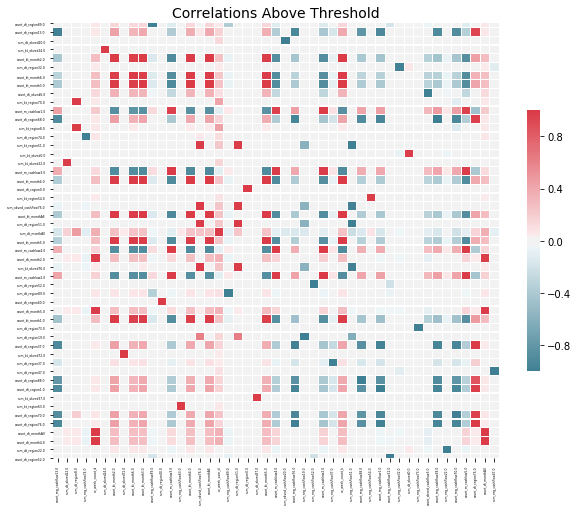

In [0]:
fs.plot_collinear()

In [0]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,count_kt_month2.0,count_kt_month1.0,0.994
1,count_kt_month3.0,count_kt_month1.0,0.980
2,count_kt_month3.0,count_kt_month2.0,0.989
3,count_kt_month4.0,count_kt_month2.0,0.982
4,count_kt_month4.0,count_kt_month3.0,0.993
5,count_kt_month5.0,count_kt_month2.0,0.981
6,count_kt_month5.0,count_kt_month3.0,0.988
7,count_kt_month5.0,count_kt_month4.0,0.991
8,count_kt_month6.0,count_kt_month4.0,0.985
9,count_kt_month6.0,count_kt_month5.0,0.984


Попробуем исключить незначимые признаки на основе модели

In [0]:
#df_full = pd.read_csv('df_fullv3.txt', sep=';')

In [0]:
drp = []
for i in list(df_full.columns):
    if'-1' in i:
        drp.append(i)
df_full = df_full.drop(drp, axis=1)
df_full.drop(subinn_lst.index,axis=0, inplace=True)
del drp
df_full.fillna(0, inplace=True)
X = df_full.drop(['okved2', 'hash_inn', 'is_public'], axis=1)
y = df_full.okved2

In [0]:
X['region'] = X['region'].astype('str')
X = pd.get_dummies(X, drop_first=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100, max_depth=60, n_jobs=-1, class_weight='balanced')
clf.fit(X_train,y_train)
print('f1:', f1_score(y_test,clf.predict(X_test), average='macro'))
print('acc:', accuracy_score(y_test,clf.predict(X_test)))

f1: 0.13585704779115487
acc: 0.34027196976736984


In [0]:
#Построим модель исключив коллинеарные признаки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.drop(fs.ops['collinear'],axis=1), y, test_size=0.2)
clf1 = RandomForestClassifier(n_estimators=100, max_depth=60, n_jobs=-1, class_weight='balanced')
clf1.fit(X_train,y_train)
print('f1:', f1_score(y_test,clf1.predict(X_test), average='macro'))
print('acc:', accuracy_score(y_test,clf1.predict(X_test)))

f1: 0.1352796053585128
acc: 0.3255583434005514


Исключение коллинеарных признаков несет потерю важной информации для части наблюдений

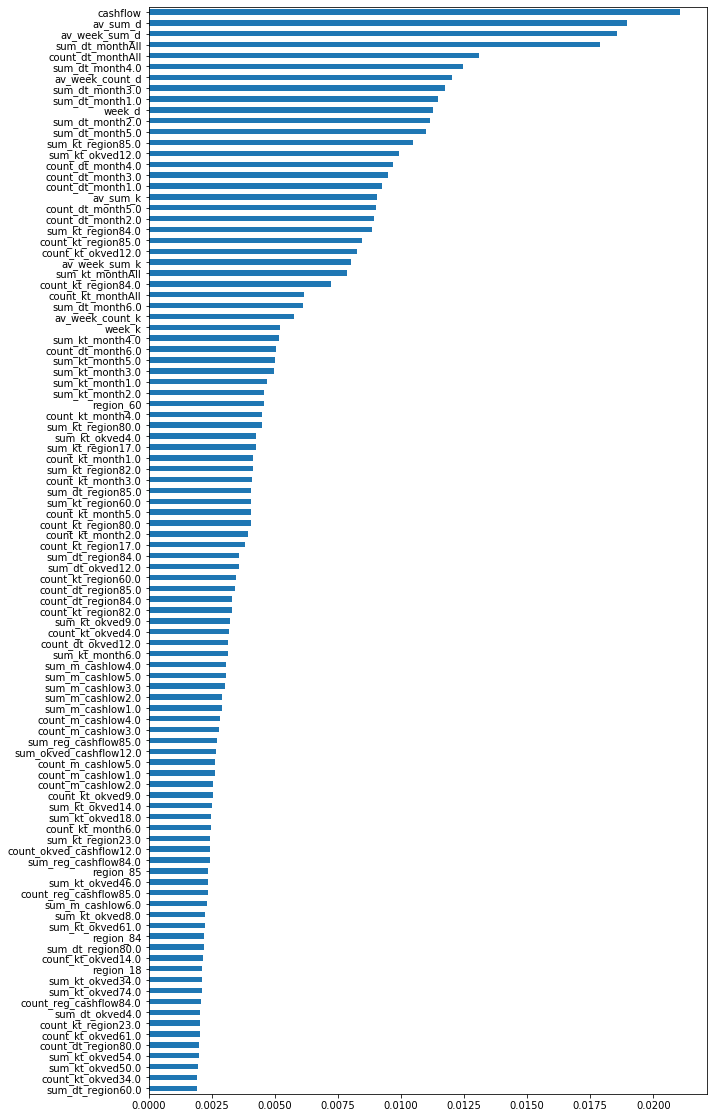

In [0]:
pd.Series(clf.feature_importances_,index=X.columns).nlargest(100).sort_values().plot(kind='barh', figsize=(10,20))

В топе оказался показатель cashflow, на вершине рейтинга также различные показатели месячной динамики

Посмотрим на 100 наименее значимых предикторов:

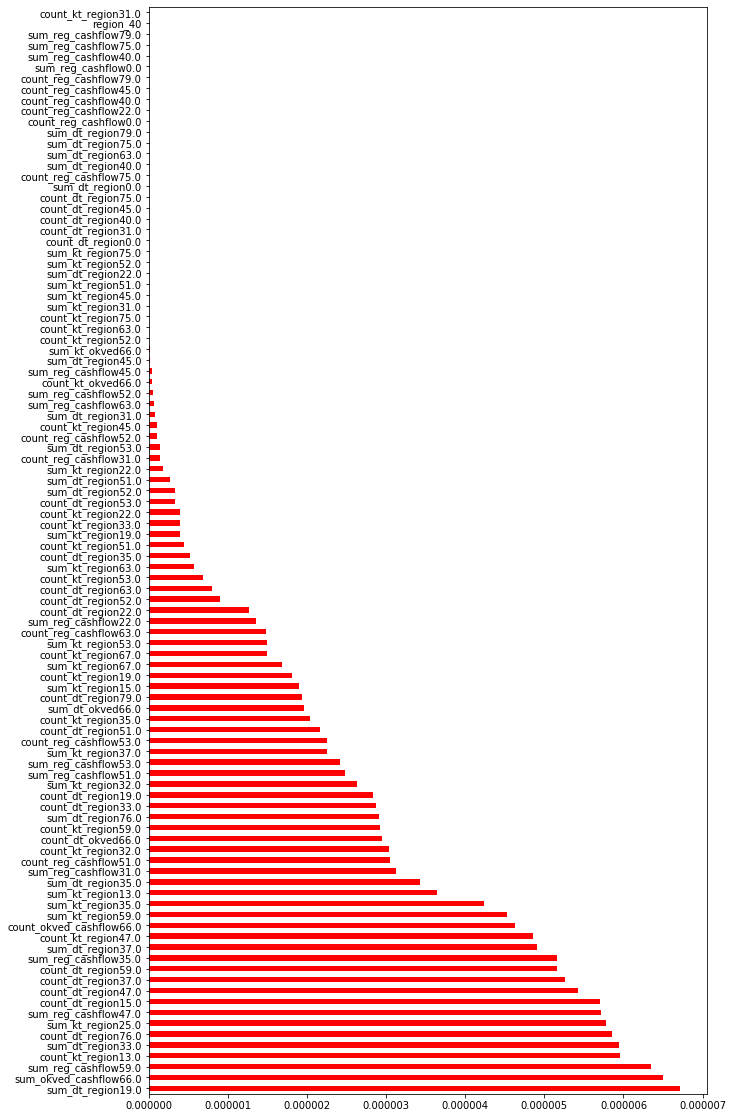

In [0]:
pd.Series(clf.feature_importances_,index=X.columns).nsmallest(100).sort_values(ascending=False).plot(kind='barh',
                                                                                     color='r', figsize=(10,20))

Дерьевья явно против информации о регионах, возможно от этих предикторов стоит избавиться т.к. они могут добавлять больше шума

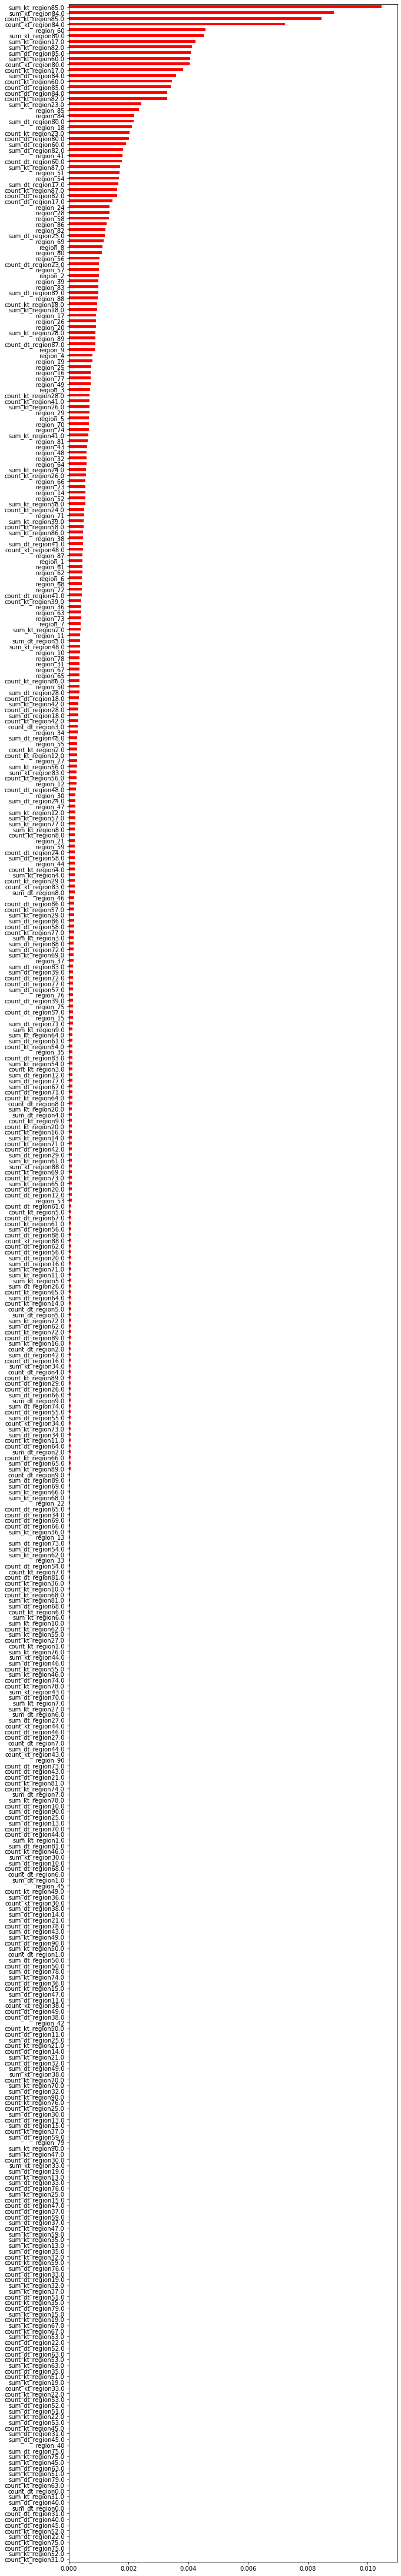

In [0]:
reg = []
for i in list(X.columns):
    if 'region' in i:
        reg.append(i)
pd.Series(clf.feature_importances_,index=X.columns)[reg].sort_values(ascending=True).plot(kind='barh',
                                                                                     color='r', figsize=(10,80))

График значимости всех георгафических переменных готоворит о том, что некоторые из них возможно имеют положительное влияние на точность модели, также дамми переменные находятся выше чем данные о сделках, следовательно их тоже лучше оставить

Оценим важность факторов еще раз, теперь на основании 5 моделей light gbm

In [0]:
fs = FeatureSelector(data = X, labels = y)

In [0]:
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'softmax', 
                            n_iterations = 5, 
                             early_stopping = True)

zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[89]	valid_0's multi_logloss: 2.60605
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 2.68613
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 2.69403
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[89]	valid_0's multi_logloss: 2.65979
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 2.69603

84 features with zero importance after one-hot encoding.



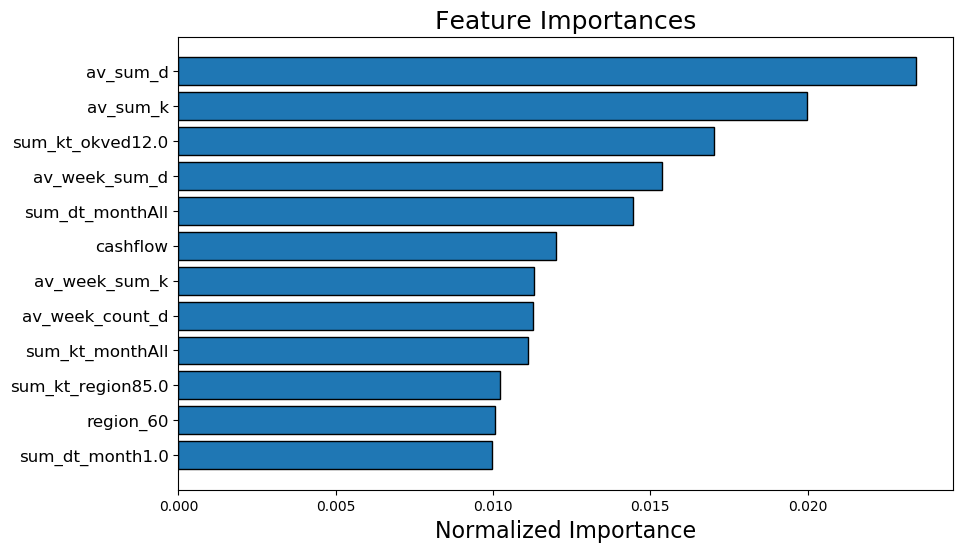

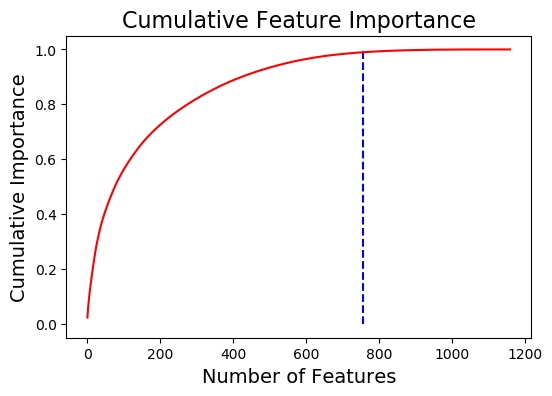

757 features required for 0.99 of cumulative importance


In [0]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [0]:
fs.identify_low_importance(cumulative_importance = 0.99)

756 features required for cumulative importance of 0.99 after one hot encoding.
403 features do not contribute to cumulative importance of 0.99.



Выявлено 403 не значимых фактора

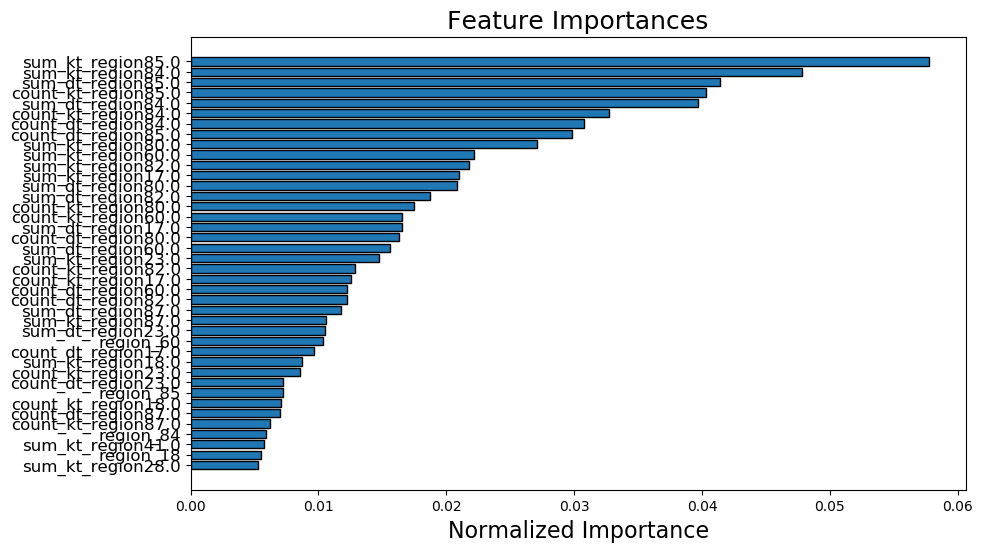

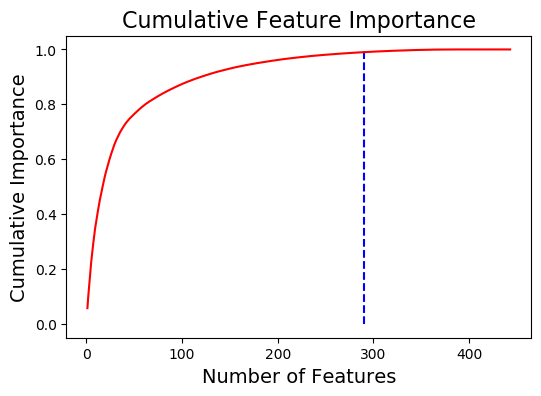

290 features required for 0.99 of cumulative importance


In [0]:
fsreg.plot_feature_importances(threshold = 0.99, plot_n = 40)

In [0]:
fsreg.identify_low_importance(cumulative_importance = 0.99)

289 features required for cumulative importance of 0.99 after one hot encoding.
154 features do not contribute to cumulative importance of 0.99.



Судя по излому графиков, среди географических факторов действительно наибольшая доля не значима

Очистим датафрейм от неинформативных факторов

In [0]:
X_selected = fs.remove(['zero_importance', 'low_importance'], keep_one_hot=True)
X_selected.shape

Removed 403 features.


(161415, 756)

In [0]:
#X_selected.to_csv('X_selectedv2.txt', sep=';', index=False)

In [0]:
#y.to_csv('y.txt', sep=';', index=False)

0         34
1         18
3         43
4         12
5         34
          ..
240063    52
240064     4
240065    12
240066    12
240067    63
Name: okved2, Length: 161415, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score

In [0]:
rf = RandomForestClassifier(n_estimators=100, max_depth=100, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f1_score(y_test, y_pred, average='macro'),
      balanced_accuracy_score(y_test, y_pred),
      accuracy_score(y_test, y_pred))

0.12608951138285676 0.1002243909029712 0.3676238267818976


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.26      0.05      0.08       164
           1       0.00      0.00      0.00         9
           2       0.33      0.05      0.09        20
           3       0.16      0.04      0.07       165
           4       0.43      0.35      0.38      1452
           5       0.17      0.06      0.09        47
           6       0.46      0.15      0.22       488
           7       0.31      0.04      0.07       129
           8       0.33      0.13      0.19       945
           9       0.19      0.04      0.06       400
          10       0.23      0.04      0.07       173
          11       0.42      0.28      0.34       549
          12       0.35      0.85      0.50      8974
          13       0.00      0.00      0.00         7
          14       0.46      0.46      0.46      2042
          15       0.25      0.02      0.04        97
          16       0.12      0.03      0.05       374
          17       0.11    

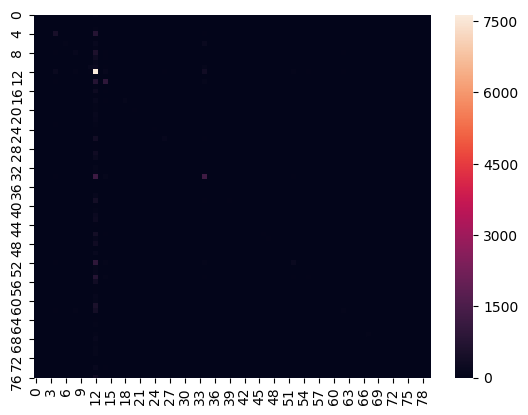

In [0]:
from sklearn.metrics import confusion_matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)))

rf все еще учится угадывать многочисленные классы

Попробуем выполнить кластеризацию используя непрерывные переменные(sum dt/kt) с помощью к-средних, и использовать найденную структуру в качестве дополнительных переменных

In [0]:
forclst = []
for i in list(X_selected.columns):
    if 'sum' in i:
        forclst.append(i)
k15 = KMeans(n_clusters=15, precompute_distances = True, n_jobs=-1)
k15.fit_predict(X_selected[forclst])
k7 = KMeans(n_clusters=7, precompute_distances = True, n_jobs=-1)
k7.fit_predict(X_selected[forclst])
k3 = KMeans(n_clusters=3, precompute_distances = True, n_jobs=-1)
k3.fit_predict(X_selected[forclst])

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
import numpy as np

In [0]:
pd.Series(k15.labels_).value_counts()

0     160119
13       937
3        242
9         53
14        34
6         12
2          5
7          3
12         2
8          2
5          2
11         1
10         1
4          1
1          1
dtype: int64

In [0]:
clst15 = pd.Series(np.array(y), index=k15.labels_)

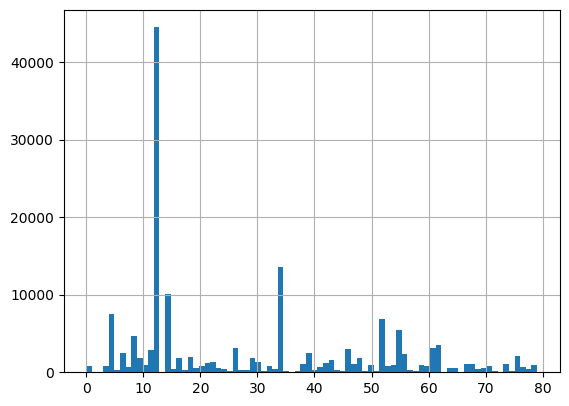

In [0]:
clst15[0].hist(bins=80)

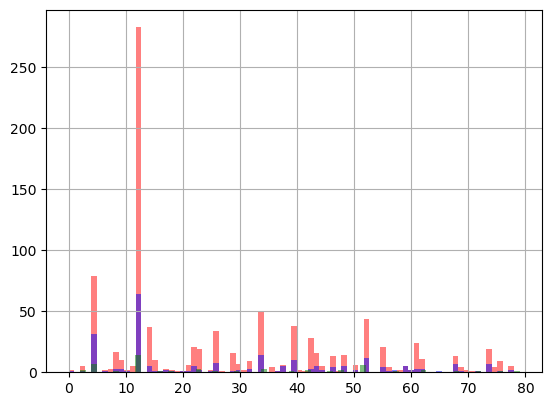

In [0]:
clst15[13].hist(color='r',alpha=0.5, bins=80)
clst15[3].hist(color='b',alpha=0.5, bins=80)
clst15[9].hist(color='g',alpha=0.5, bins=80)

В к15 в третьем по многочисленности кластере несколько иной расклад сил, некоторые пики различаются, что может быть полезно для классификации, но довольно малоинформативно

In [0]:
pd.Series(k7.labels_).value_counts()

0    161114
3       273
2        15
6        10
5         1
4         1
1         1
dtype: int64

In [0]:
clst7 = pd.Series(np.array(y), index=k7.labels_)

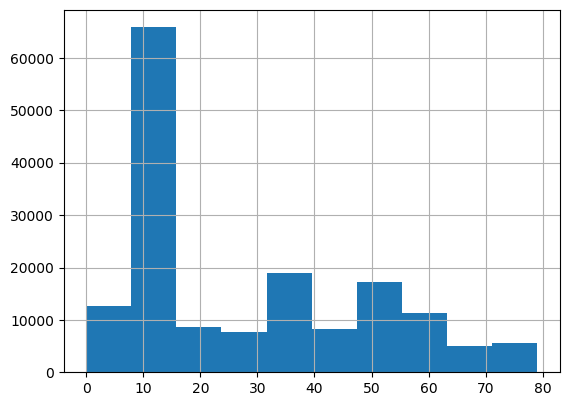

In [0]:
clst7[0].hist()

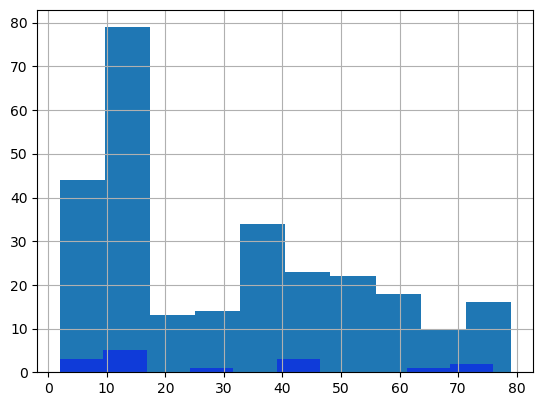

In [0]:
clst7[3].hist()
clst7[2].hist(color='b',alpha=0.5)

k7 также оказался малоинформативным

In [0]:
pd.Series(k3.labels_).value_counts()

0    161375
1        39
2         1
dtype: int64

In [0]:
clst3 = pd.Series(np.array(y), index=k3.labels_)

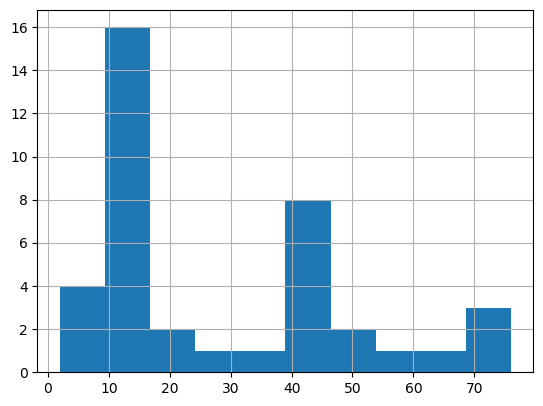

In [0]:
clst3[1].hist()

В целом применение кластерного анализа не дало каких либо значительных результатов. Однако наблюдения не вошедшие в самый многочисленный кластер можно рассматривать как аномалии при дальнейшем анализе.

# Насколько данные для обучения модели (не)похожи на тестовую выборку?

Так как было проведено построение и отбор признаков(на минималках), то перед непосредственной классификацией, необходимо сравнить тестовую(is_public=False) и обучающую выборки. Гипотеза следующая: если классификатор не сможет отличить тестовую от обучающей выборки лучше чем случайный предсказатель (roc_auc_score<50), то ковариационный сдвиг отсутствует и можем смело подгонять модельки.

In [0]:
#df_full = pd.read_csv('df_fullv3.txt', sep=';')

In [0]:
print(df_full.shape)
df_full.head()

(240069, 1079)


,hash_inn,okved2,region,is_public,count_kt_month1.0,count_kt_month2.0,count_kt_month3.0,count_kt_month4.0,count_kt_month5.0,count_kt_month6.0,count_kt_monthAll,sum_kt_month1.0,sum_kt_month2.0,sum_kt_month3.0,sum_kt_month4.0,sum_kt_month5.0,sum_kt_month6.0,sum_kt_monthAll,count_dt_month1.0,count_dt_month2.0,count_dt_month3.0,count_dt_month4.0,count_dt_month5.0,count_dt_month6.0,count_dt_monthAll,sum_dt_month1.0,sum_dt_month2.0,sum_dt_month3.0,sum_dt_month4.0,sum_dt_month5.0,sum_dt_month6.0,sum_dt_monthAll,count_kt_okved-1.0,count_kt_okved0.0,count_kt_okved1.0,count_kt_okved2.0,count_kt_okved3.0,count_kt_okved4.0,count_kt_okved5.0,count_kt_okved6.0,count_kt_okved7.0,count_kt_okved8.0,count_kt_okved9.0,count_kt_okved10.0,count_kt_okved11.0,count_kt_okved12.0,count_kt_okved13.0,count_kt_okved14.0,count_kt_okved15.0,count_kt_okved16.0,count_kt_okved17.0,count_kt_okved18.0,count_kt_okved19.0,count_kt_okved20.0,count_kt_okved21.0,count_kt_okved22.0,count_kt_okved23.0,count_kt_okved24.0,count_kt_okved25.0,count_kt_okved26.0,count_kt_okved27.0,count_kt_okved28.0,count_kt_okved29.0,count_kt_okved30.0,count_kt_okved31.0,count_kt_okved32.0,count_kt_okved33.0,count_kt_okved34.0,count_kt_okved35.0,count_kt_okved36.0,count_kt_okved37.0,count_kt_okved38.0,count_kt_okved39.0,count_kt_okved40.0,count_kt_okved41.0,count_kt_okved42.0,count_kt_okved43.0,count_kt_okved44.0,count_kt_okved45.0,count_kt_okved46.0,count_kt_okved47.0,count_kt_okved48.0,count_kt_okved49.0,count_kt_okved50.0,count_kt_okved51.0,count_kt_okved52.0,count_kt_okved53.0,count_kt_okved54.0,count_kt_okved55.0,count_kt_okved56.0,count_kt_okved57.0,count_kt_okved58.0,count_kt_okved59.0,count_kt_okved60.0,count_kt_okved61.0,count_kt_okved62.0,count_kt_okved63.0,count_kt_okved64.0,count_kt_okved65.0,count_kt_okved66.0,count_kt_okved67.0,count_kt_okved68.0,count_kt_okved69.0,count_kt_okved70.0,count_kt_okved71.0,count_kt_okved72.0,count_kt_okved73.0,count_kt_okved74.0,count_kt_okved75.0,count_kt_okved76.0,count_kt_okved77.0,count_kt_okved78.0,count_kt_okved79.0,sum_kt_okved-1.0,sum_kt_okved0.0,sum_kt_okved1.0,sum_kt_okved2.0,sum_kt_okved3.0,sum_kt_okved4.0,sum_kt_okved5.0,sum_kt_okved6.0,sum_kt_okved7.0,sum_kt_okved8.0,sum_kt_okved9.0,sum_kt_okved10.0,sum_kt_okved11.0,sum_kt_okved12.0,sum_kt_okved13.0,sum_kt_okved14.0,sum_kt_okved15.0,sum_kt_okved16.0,sum_kt_okved17.0,sum_kt_okved18.0,sum_kt_okved19.0,sum_kt_okved20.0,sum_kt_okved21.0,sum_kt_okved22.0,sum_kt_okved23.0,sum_kt_okved24.0,sum_kt_okved25.0,sum_kt_okved26.0,sum_kt_okved27.0,sum_kt_okved28.0,sum_kt_okved29.0,sum_kt_okved30.0,sum_kt_okved31.0,sum_kt_okved32.0,sum_kt_okved33.0,sum_kt_okved34.0,sum_kt_okved35.0,sum_kt_okved36.0,sum_kt_okved37.0,sum_kt_okved38.0,sum_kt_okved39.0,sum_kt_okved40.0,sum_kt_okved41.0,sum_kt_okved42.0,sum_kt_okved43.0,sum_kt_okved44.0,sum_kt_okved45.0,sum_kt_okved46.0,sum_kt_okved47.0,sum_kt_okved48.0,sum_kt_okved49.0,sum_kt_okved50.0,sum_kt_okved51.0,sum_kt_okved52.0,sum_kt_okved53.0,sum_kt_okved54.0,sum_kt_okved55.0,sum_kt_okved56.0,sum_kt_okved57.0,sum_kt_okved58.0,sum_kt_okved59.0,sum_kt_okved60.0,sum_kt_okved61.0,sum_kt_okved62.0,sum_kt_okved63.0,sum_kt_okved64.0,sum_kt_okved65.0,sum_kt_okved66.0,sum_kt_okved67.0,sum_kt_okved68.0,sum_kt_okved69.0,sum_kt_okved70.0,sum_kt_okved71.0,sum_kt_okved72.0,sum_kt_okved73.0,sum_kt_okved74.0,sum_kt_okved75.0,sum_kt_okved76.0,sum_kt_okved77.0,sum_kt_okved78.0,sum_kt_okved79.0,count_dt_okved-1.0,count_dt_okved0.0,count_dt_okved1.0,count_dt_okved2.0,count_dt_okved3.0,count_dt_okved4.0,count_dt_okved5.0,count_dt_okved6.0,count_dt_okved7.0,count_dt_okved8.0,count_dt_okved9.0,count_dt_okved10.0,count_dt_okved11.0,count_dt_okved12.0,count_dt_okved13.0,count_dt_okved14.0,count_dt_okved15.0,count_dt_okved16.0,count_dt_okved17.0,count_dt_okved18.0,count_dt_okved19.0,count_dt_okved20.0,count_dt_okved21.0,count_dt_okved22.0,count_dt_okved23.0,count_dt_okved24.0,count_dt_okved25.0,count_dt_okved26.0,count_dt_okved27.0,count_dt_okved28.0,count_dt_okved29.0,count_dt_okved3

In [0]:
y = df_full.is_public

In [0]:
df_full.fillna(0, inplace=True)
X = df_full.drop(['okved2', 'hash_inn', 'is_public'], axis=1)
X['region'] = X['region'].astype('str')
X = pd.get_dummies(X, drop_first=True)

MemoryError: 

In [0]:
X = X[X_selected.columns]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rf = RandomForestClassifier(n_estimators=100, max_depth=100, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(roc_auc_score(y_test, y_pred))

0.5011341537490072


Значение roc-aug говорит нам, что rf классификатор получился не намного лучше чем случайный предсказатель меток, соответственнно можно сделать вывод об отсутствии ковариантного сдвига и каких либо отличительных черт в тестовых данных

In [0]:
del X_train, X_test, y_train, y_test

# Выбросы

Так как данные представлены как числовыми(дискретными, непрерывными) так и категориальными признаками, для устранения аномалий будет использоваться IsolationForest

Так как при кластерном анализе количество наблюдений в малочисленных кластерах варьировалось от 200 до 1000+ установим параметр contamination на 0.005 и сравним полученный результат с автоматическим

In [0]:
#X = pd.read_csv('X_selectedv2.txt', sep=';')
#y = pd.read_csv('y.txt', sep=';', header=None)

In [0]:
X.shape

(161415, 756)

In [0]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(behaviour='new',contamination='auto',
                      random_state=42)
pred_out_auto = isf.fit_predict(X)

C:\Data\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [0]:
otliers = pd.Series(pred_out_auto)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0BD32E348>]],
      dtype=object)

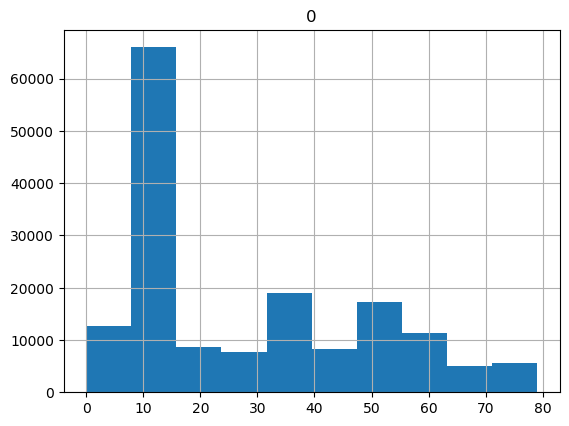

In [0]:
y.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0AC9F4B08>]],
      dtype=object)

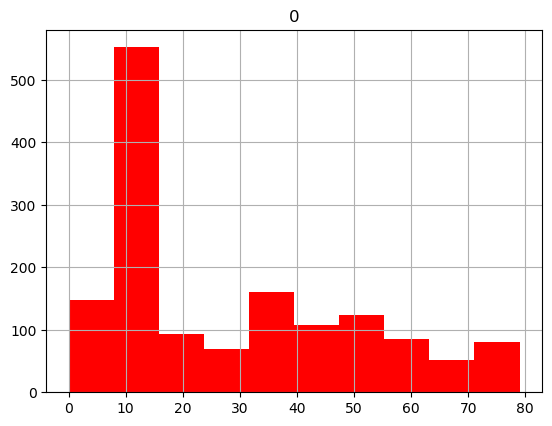

In [0]:
y[otliers<1].hist(color='r')

Судя по гистограммам, удаление найденных выбросов не должно ощутимо сказаться на структуре данных

In [0]:
y = y.drop(y[otliers<1].index, axis=0)
X = X.drop(X[otliers<1].index, axis=0)

In [0]:
y.shape

(159946, 1)

In [0]:
#y.to_csv('y_selectedv3.txt', index=False)
#X.to_csv('X_selectedv3.txt',sep=';', index=False)

# Модельки. Часть 1 (на сырых данных*)

*В этом разделе использовались данные не со всеми созданными в конечной версии переменными

Так как классы не сбалансированы, то использование лишь accuracy для оценки качества моделей недостаточно, поэтому при построении моделей помимо общего accuracy будет также обращено внимание на macro_f1, а также частично на balanced accuracy

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

max_depth=60: 0.13080147680168666
max_depth=70: 0.1301090144974657
max_depth=80: 0.1281054440723231
max_depth=90: 0.12938324644540944


C:\Data\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


max_depth=100: 0.1255703809292648
max_depth=110: 0.12564262568114018
max_depth=120: 0.1259240885557409
max_depth=130: 0.12694130494523137


C:\Data\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


max_depth=140: 0.12656180981197465


,max_depth,val
0,60,0.130801


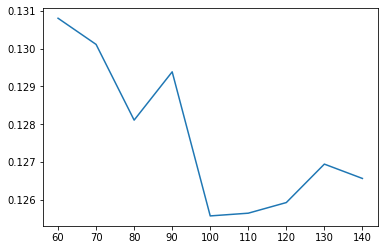

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
val_history = list()

# Вычисление точности на тесте
for i in range(60, 150, 10):
    rf = RandomForestClassifier(n_estimators=100, max_depth=i, n_jobs=-1, class_weight='balanced')
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    val = f1_score(y_test, y_pred, average='macro')
    print('max_depth=%i:'%i, val)
    val_history.append([i, val])

# Определение оптимальной глубины деревьев
val_history = pd.DataFrame(val_history, columns=['max_depth', 'val'])
display(val_history[val_history.val == val_history.val.max()])
plt.plot(val_history.max_depth, val_history.val);

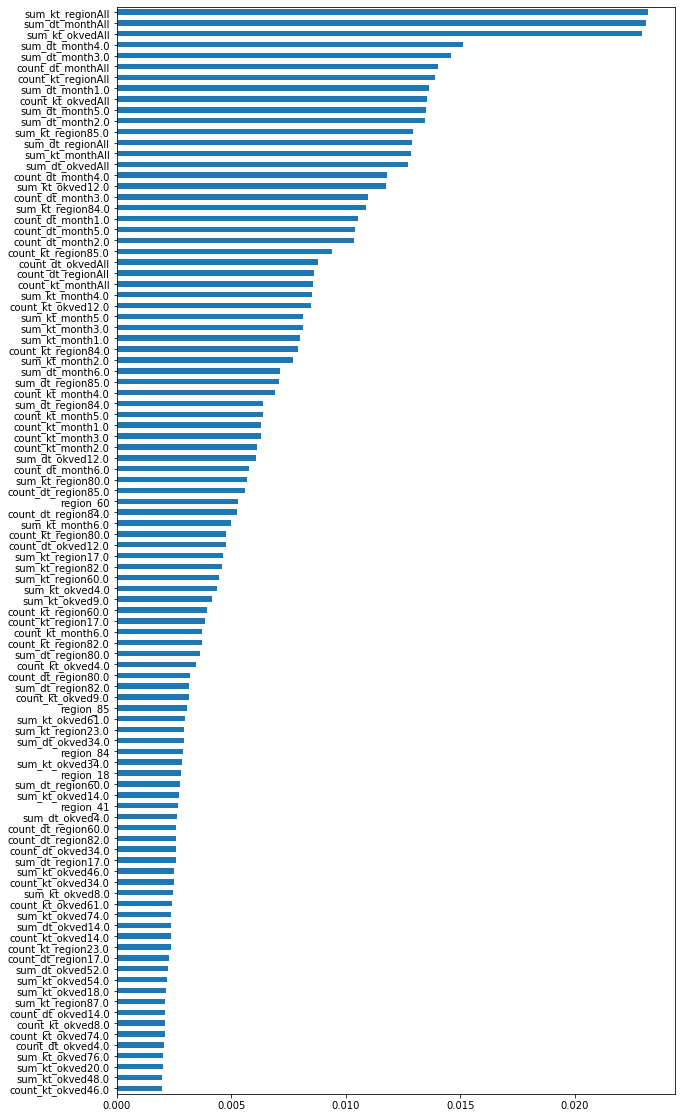

In [0]:
pd.Series(rf.feature_importances_,index=X_train.columns).nlargest(100).sort_values().plot(kind='barh', figsize=(10,20))

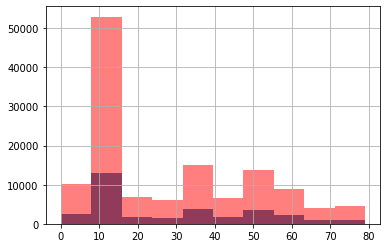

In [0]:
y_test.hist()
y_train.hist(color='r',alpha=0.5)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

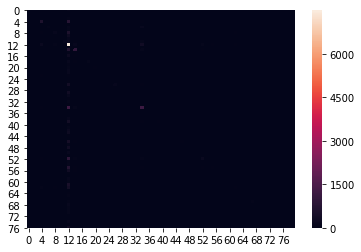

In [0]:
y_pred = rf1.predict(X_test)

              precision    recall  f1-score   support

           0       0.43      0.09      0.14       173
           1       0.17      0.14      0.15         7
           2       0.43      0.21      0.29        14
           3       0.21      0.06      0.09       184
           4       0.44      0.37      0.40      1571
           5       0.06      0.02      0.03        52
           6       0.40      0.14      0.21       459
           7       0.33      0.03      0.06       133
           8       0.33      0.14      0.19       959
           9       0.18      0.03      0.06       384
          10       0.23      0.04      0.07       175
          11       0.37      0.26      0.30       536
          12       0.35      0.84      0.50      8905
          13       0.00      0.00      0.00        17
          14       0.44      0.49      0.46      1980
          15       0.09      0.01      0.02        84
          16       0.14      0.04      0.06       381
          17       0.67    

C:\Data\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


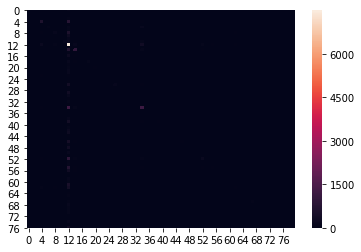

In [0]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))

# Поиграемся с ресэмплингом

In [0]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection)

max_depth=50: 0.12819371899665744
max_depth=60: 0.13740705212788246
max_depth=70: 0.14204338922837248
max_depth=80: 0.14153281295933937


,max_depth,val
2,70,0.142043


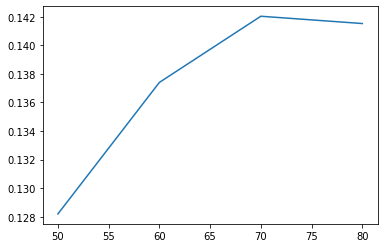

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

val_history = list()

# Вычисление точности на тесте
for i in [50,60,70,80]:
    sampler = NearMiss(sampling_strategy='majority')
    clf = make_pipeline(sampler, RandomForestClassifier(n_estimators=100, max_depth=i, n_jobs=-1, class_weight='balanced'))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    val = f1_score(y_test, y_pred, average='macro')
    print('max_depth=%i:'%i, val)
    val_history.append([i, val])

# Определение оптимальной глубины деревьев
val_history = pd.DataFrame(val_history, columns=['max_depth', 'val'])
display(val_history[val_history.val == val_history.val.max()])
plt.plot(val_history.max_depth, val_history.val);

С даунсэмплингом преобладающего класса удалось добиться более высокого f1, правда accuracy снизилось

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
clf.score(X_test, y_test)

0.2012824086980764

max_depth=60: 0.13309536764499047
max_depth=80: 0.13857507377822187
max_depth=100: 0.13926219816132135
max_depth=120: 0.1378927730830315
max_depth=140: 0.14127970312560265


,max_depth,val
4,140,0.14128


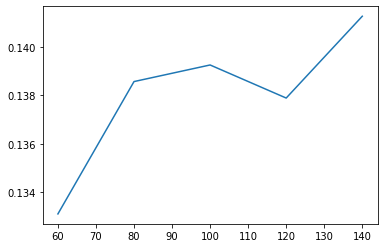

In [0]:
val_history = list()

# Вычисление точности на тесте
for i in [60,80,100,120,140]:
    sampler = NearMiss(sampling_strategy='majority', version=2)
    clf = make_pipeline(sampler, RandomForestClassifier(n_estimators=100, max_depth=i, n_jobs=-1, class_weight='balanced'))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    val = f1_score(y_test, y_pred, average='macro')
    print('max_depth=%i:'%i, val)
    val_history.append([i, val])

# Определение оптимальной глубины деревьев
val_history = pd.DataFrame(val_history, columns=['max_depth', 'val'])
display(val_history[val_history.val == val_history.val.max()])
plt.plot(val_history.max_depth, val_history.val);

In [0]:
clf.score(X_test, y_test)

0.20301706780658552

max_depth=50: 0.1304509606070813
max_depth=100: 0.13926744419635903
max_depth=150: 0.14578659214117873


,max_depth,val
2,150,0.145787


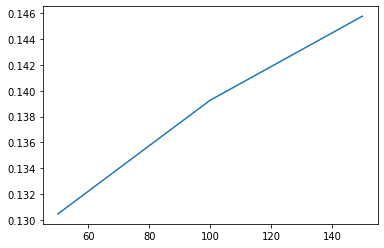

In [0]:
val_history = list()

# Вычисление точности на тесте
for i in [50,100,150]:
    sampler = NearMiss(sampling_strategy='majority', version=3)
    clf = make_pipeline(sampler, RandomForestClassifier(n_estimators=100, max_depth=i, n_jobs=-1, class_weight='balanced'))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    val = f1_score(y_test, y_pred, average='macro')
    print('max_depth=%i:'%i, val)
    val_history.append([i, val])

# Определение оптимальной глубины деревьев
val_history = pd.DataFrame(val_history, columns=['max_depth', 'val'])
display(val_history[val_history.val == val_history.val.max()])
plt.plot(val_history.max_depth, val_history.val);

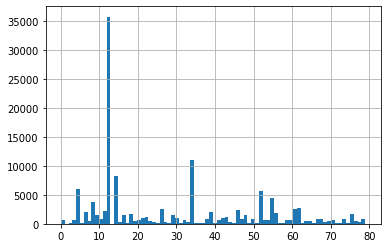

In [0]:
y_train.hist(bins=80)

In [0]:
clf.score(X_test, y_test)

0.2037914691943128

              precision    recall  f1-score   support

           0       0.15      0.14      0.14       160
           1       0.17      0.08      0.11        12
           2       0.20      0.11      0.14        19
           3       0.22      0.11      0.15       154
           4       0.25      0.56      0.35      1519
           5       0.24      0.10      0.14        52
           6       0.33      0.14      0.20       477
           7       0.12      0.04      0.06       132
           8       0.17      0.28      0.21       943
           9       0.13      0.11      0.12       384
          10       0.19      0.10      0.13       203
          11       0.29      0.30      0.30       571
          12       0.40      0.00      0.00      9126
          13       0.17      0.06      0.08        18
          14       0.24      0.63      0.35      1961
          15       0.18      0.11      0.14        89
          16       0.13      0.08      0.10       362
          17       0.21    

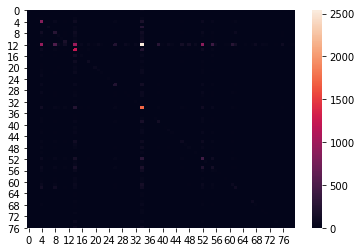

In [0]:
print(classification_report(y_test, y_pred))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Методы ресэмплинга помогают повысить f-меру, но точность предсказаний на тесте значительно снижается

Так как один оквэд значительно преобладает среди всех остальных, то можно предположить схожий дисбаланс на неразмеченных данных, соответветственно, по мимо повышения f1 необходимо сохранять высокий accuracy

Помимо даунсэмплинга для повышения качества классификации можно также рассматривать обратные методы, такие как SMOTE, но к сожалению ввиду крайней ограниченности ресурсов для вычислений, на данный момент их применение останется за пределами данного ноутбука

# Модельки. Часть 2

In [0]:
X = pd.read_csv('X_selected.txt', sep=';')
print(X.shape)
y = np.ravel(pd.read_csv('y_selected.txt', sep=';', header=None))
print(y.shape)

(161415, 530)


FileNotFoundError: [Errno 2] File b'y_selected.txt' does not exist: b'y_selected.txt'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
X = pd.read_csv('/content/drive/My Drive/X_selectedv1.txt', sep=';')
print(X.shape)
y = np.ravel(pd.read_csv('/content/drive/My Drive/y_selectedv1.txt', sep=';', header=None))
print(y.shape)

(160003, 530)
(160003,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
del X, y

Начнем снова с rf, будем расчитывать macro f1 и accuracy

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%%time
rf = RandomForestClassifier(n_estimators=200, max_depth=100, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
val = f1_score(y_test, y_pred, average='macro')
valacc = accuracy_score(y_test, y_pred)
print('f1:', val, 'acc:', valacc)

Wall time: 0 ns
f1: 0.11814691650219329 acc: 0.3709884066122934
Wall time: 0 ns


На rf удалось добиться повышения точности (acc) засчет отбора признаков и отсеивания выбросов, но f1 оставляет желать лучшего

In [0]:
#Нормализуем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
%%time
rf = RandomForestClassifier(n_estimators=200, max_depth=100, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
val = f1_score(y_test, y_pred, average='macro')
valacc = accuracy_score(y_test, y_pred)
print('f1:', val, 'acc:', valacc)

f1: 0.12183196740423893 acc: 0.3719571263398019
Wall time: 3min 5s


Попробуем научиться различать наиболее многичисленный класс

In [0]:
y_train12 = y_train==12
y_test12 = y_test==12

In [0]:
y_train==12

array([False, False,  True, ..., False, False,  True])

In [0]:
%%time
rf = RandomForestClassifier(n_estimators=200, max_depth=200, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train12)
y_pred = rf.predict(X_test)
val = f1_score(y_test12, y_pred)
valacc = accuracy_score(y_test12, y_pred)
print('f1:', val, 'acc:', valacc)

f1: 0.3275917578879588 acc: 0.7389456579481891
Wall time: 1min 9s


In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import lightgbm as lgbm

In [0]:
clf = lgbm.LGBMClassifier(boosting_type='gbdt',  objective='binary', device='gpu',
                   num_boost_round=2000, learning_rate=0.01, metric='auc',num_leaves=31,
                    max_depth=10, n_estimators=100, subsample_for_bin=200000, class_weight='balanced')
clf.fit(X_train, y_train12)
y_pred = clf.predict(X_test)
val = f1_score(y_test12, y_pred)
valacc = accuracy_score(y_test12, y_pred)
print('f1:', val, 'acc:', valacc)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


NameError: ignored

auc: 0.6835786521432672
f1: 0.5473332453941872 acc: 0.6782913033967688
              precision    recall  f1-score   support

       False       0.85      0.67      0.75     23053
        True       0.45      0.70      0.55      8948

    accuracy                           0.68     32001
   macro avg       0.65      0.68      0.65     32001
weighted avg       0.74      0.68      0.69     32001



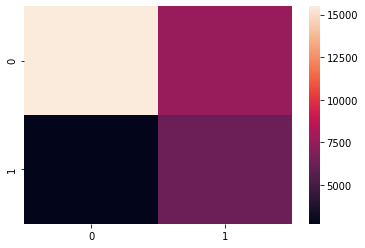

In [0]:
val = f1_score(y_test12, y_pred)
valacc = accuracy_score(y_test12, y_pred)
print('auc:',roc_auc_score(y_test12, y_pred))
print('f1:', val, 'acc:', valacc)
from sklearn.metrics import classification_report
print(classification_report(y_test12,y_pred))
from sklearn.metrics import confusion_matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test12,y_pred)))

Light GBM пока что лучше всех справляется с отделением 12го оквэда от всех остальных

D=15: 0.5110805058219606
acc: 0.6339176900721852
auc: 0.6493269425931316
D=20: 0.5118456169164443
acc: 0.6284803599887504
auc: 0.6493138486286513
D=25: 0.5118666338178534
acc: 0.6285116090122184
auc: 0.649335537779738
D=30: 0.5118666338178534
acc: 0.6285116090122184
auc: 0.649335537779738
D=35: 0.5118666338178534
acc: 0.6285116090122184
auc: 0.649335537779738
D=40: 0.5118666338178534
acc: 0.6285116090122184
auc: 0.649335537779738
D=45: 0.5118666338178534
acc: 0.6285116090122184
auc: 0.649335537779738
D=50: 0.5118666338178534
acc: 0.6285116090122184
auc: 0.649335537779738
D=55: 0.5118666338178534
acc: 0.6285116090122184
auc: 0.649335537779738


,D,val
2,25,0.511867
3,30,0.511867
4,35,0.511867
5,40,0.511867
6,45,0.511867
7,50,0.511867
8,55,0.511867


CPU times: user 5min 18s, sys: 4.92 s, total: 5min 23s
Wall time: 3min 5s


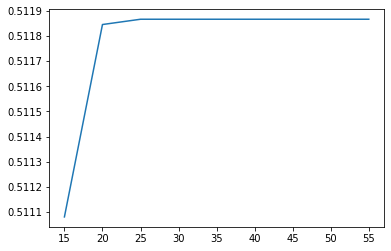

In [0]:
%%time
#Попробуем подобрать подходящие параметры глубины деревьев
val_history = list()

for i in range(15,60,5):
    clf = lgbm.LGBMClassifier(boosting_type='gbdt',  objective='binary', device='gpu', learning_rate=0.01, metric='auc', 
                    max_depth=i, n_estimators=100, class_weight='balanced')
    clf.fit(X_train, y_train12)
    y_pred = clf.predict(X_test)
    val = f1_score(y_test12, y_pred)
    valacc = accuracy_score(y_test12, y_pred)
    print('D=%i:'%i, val)
    print('acc:',accuracy_score(y_test12, y_pred))
    print('auc:',roc_auc_score(y_test12, y_pred))
    val_history.append([i, val])

val_history = pd.DataFrame(val_history, columns=['D', 'val'])
display(val_history[val_history.val == val_history.val.max()])
plt.plot(val_history.D, val_history.val);

In [0]:
%%time
#Попробуем подобрать подходящие параметры lr и количества деревьев
for j in [0.0001,0.001,0.01,0.1]:
    for i in range(100,1000,200):
        clf = lgbm.LGBMClassifier(boosting_type='gbdt',  objective='binary', device='gpu', learning_rate=j, metric='auc', 
                      max_depth=15, n_estimators=i, class_weight='balanced')
        clf.fit(X_train, y_train12)
        y_pred = clf.predict(X_test)
        val = f1_score(y_test12, y_pred)
        valacc = accuracy_score(y_test12, y_pred)
        print('lr=%i:'%j,'n=%i:'%i,'f1:', val)
        print('acc:',accuracy_score(y_test12, y_pred))
        print('auc:',roc_auc_score(y_test12, y_pred))

lr=0: n=100: f1: 0.4933777592669721
acc: 0.6198868785350458
auc: 0.6327506622559769
lr=0: n=300: f1: 0.4942581534221405
acc: 0.6215430767788507
auc: 0.6337292409760866
lr=0: n=500: f1: 0.4948809774594481
acc: 0.6253554576419487
auc: 0.6348368008213217
lr=0: n=700: f1: 0.4963503649635036
acc: 0.633448954720165
auc: 0.6372746900056023
lr=0: n=900: f1: 0.49728752260397835
acc: 0.6351364019874379
auc: 0.6382749578767987
lr=0: n=100: f1: 0.4966201762642252
acc: 0.6323239898753164
auc: 0.6373144227463949
lr=0: n=300: f1: 0.500537767849756
acc: 0.6226992906471672
auc: 0.639044721555803
lr=0: n=500: f1: 0.5050193050193049
acc: 0.6194181431830256
auc: 0.6423402096636037
lr=0: n=700: f1: 0.5076523245740687
acc: 0.6270429049092215
auc: 0.6455810070789627
lr=0: n=900: f1: 0.5102539669387248
acc: 0.6306052935845755
auc: 0.6482245165903195
lr=0: n=100: f1: 0.5110805058219606
acc: 0.6339176900721852
auc: 0.6493269425931316
lr=0: n=300: f1: 0.5285482632073056
acc: 0.6547607887253524
auc: 0.66618685439

Полученные результаты говорят о том, что чем больше деревьев - тем лучше, при этом с повышением lr точность росла, что довольно необычно

In [0]:
%%time
val_history = list()
for i in np.arange(0.05,0.5,0.01):
    clf = lgbm.LGBMClassifier(boosting_type='gbdt',  objective='binary', device='gpu', learning_rate=i, metric=['auc','accuracy'], 
                    max_depth=15, n_estimators=1000, class_weight='balanced')
    clf.fit(X_train, y_train12)
    y_pred = clf.predict(X_test)
    val = f1_score(y_test12, y_pred)
    valacc = accuracy_score(y_test12, y_pred)
    print('lr:',i,'f1',val)
    print('acc:',accuracy_score(y_test12, y_pred))
    print('auc:',roc_auc_score(y_test12, y_pred))
    val_history.append([i, val])

val_history = pd.DataFrame(val_history, columns=['D', 'val'])
display(val_history[val_history.val == val_history.val.max()])
plt.plot(val_history.D, val_history.val);

lr: 0.05 f1 0.551109917651271
acc: 0.6865722946157933
auc: 0.6870355969289714
lr: 0.060000000000000005 f1 0.5491574299360188
acc: 0.6873222711790257
auc: 0.6854022133327836
lr: 0.07 f1 0.5484250543084721
acc: 0.6881972438361301
auc: 0.6848128855508389
lr: 0.08000000000000002 f1 0.545081219200584
acc: 0.6884472360238743
auc: 0.6820461226148502
lr: 0.09000000000000001 f1 0.5451144968524769
acc: 0.6883847379769382
auc: 0.6820711228276696
lr: 0.1 f1 0.5437456807187283
acc: 0.6905409205962314
auc: 0.6810376691979209
lr: 0.11000000000000001 f1 0.5416840253668472
acc: 0.6906034186431674
auc: 0.6793715846252794
lr: 0.12000000000000001 f1 0.540989694550181
acc: 0.6910096559482516
auc: 0.6788330014094942
lr: 0.13 f1 0.5376905505570836
acc: 0.6901034342676792
auc: 0.6761526605782042


KeyboardInterrupt: ignored

In [0]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(alpha=0.0001, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)
clf.fit(X_train, y_train12)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
roc_auc_score(y_test12, clf.predict(X_test))

0.6285198560051108

              precision    recall  f1-score   support

       False       0.81      0.63      0.71     23011
        True       0.40      0.63      0.49      8990

    accuracy                           0.63     32001
   macro avg       0.61      0.63      0.60     32001
weighted avg       0.70      0.63      0.65     32001



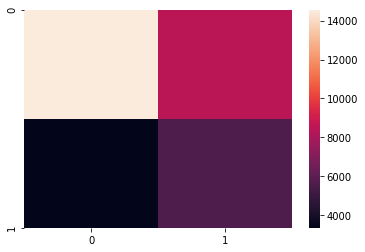

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test12,clf.predict(X_test)))
from sklearn.metrics import confusion_matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test12,clf.predict(X_test))))

svm удается лучше чем у rf разделять классы, не смотря на меньшее значение accuracy, стоит попробовать нелинейные ядра

In [0]:
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn import linear_model
from sklearn import pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [0]:
feature_map_nystroem = Nystroem(gamma=.2,
                                    random_state=1,
                                    n_components=1000)
feature_map_nystroem.fit(X_train)

Nystroem(coef0=None, degree=None, gamma=0.2, kernel='rbf', kernel_params=None,
         n_components=1000, random_state=1)

D=0: 0.5694975606587398
0.432298990656542
D=0: 0.60619423227309
0.5759195025155464
D=0: 0.6065721798715032
0.6370738414424549
D=0: 0.5402210694230654
0.7193212712102747
D=0: 0.5963962730835928
0.5322958657541952
D=0: 0.5808512207561615
0.684197368832224
D=0: 0.591896147929348
0.5221711821505578
D=0: 0.5654439855991059
0.6959782506796662
D=0: 0.6044614962416515
0.5925752320239992


,D,val
2,0.0003,0.606572


Wall time: 52.9 s


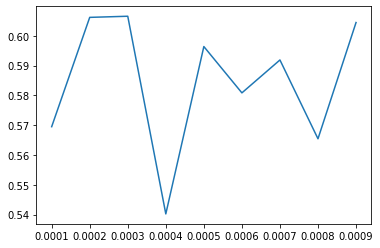

In [0]:
%%time
val_history = list()

# Определяем подходящий параметр gamma
for i in np.arange(0.0001,0.001,0.0001):
    feature_map_nystroem = Nystroem(kernel='rbf',
                                    gamma=i,
                                    random_state=1,
                                    n_components=600)
    svc = linear_model.SGDClassifier(alpha=0.005, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate="constant", loss='log', max_iter=1000,
       n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.05,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)
    nystroem_approx_svm = pipeline.Pipeline([("feature_map", feature_map_nystroem),
                                        ("svm", svc)])
    nystroem_approx_svm.fit(X_train, y_train12)
    y_pred = nystroem_approx_svm.predict(X_test)
    val = roc_auc_score(y_test12, y_pred)
    print('D=%i:'%i, val)
    print(accuracy_score(y_test12, y_pred))
    val_history.append([i, val])

val_history = pd.DataFrame(val_history, columns=['D', 'val'])
display(val_history[val_history.val == val_history.val.max()])
plt.plot(val_history.D, val_history.val);

Результаты получаются неустойчивыми и оставляют желать лучшего, дальнейшее исследование усложняет большое количество настраиваемых гиперпараметров

Здесь чемпионом оказался lgbm, предикты этой модели можно использовать в качестве фактора, для лучшего отделения 12го оквэда. Также полученные результаты наталкивают на мысль использовать подход ova в lgbm

Вернемся к задаче мультиклассовой классификации

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [0]:
#логрег ovr

val_history = list()
from sklearn.linear_model import LogisticRegression

# Определяем подходящий параметр gamma
for i in range(10,100,10):
    clf = LogisticRegression(C=i,class_weight='balanced',solver='lbfgs', multi_class='ovr', n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    val = f1_score(y_test, y_pred, average='macro')
    print('n=%i:'%i, val)
    print(accuracy_score(y_test, y_pred))
    val_history.append([i, val])

val_history = pd.DataFrame(val_history, columns=['D', 'val'])
display(val_history[val_history.val == val_history.val.max()])
plt.plot(val_history.D, val_history.val);

n=10: 0.0896313886541984
0.10587169150964032
n=20: 0.08857774662917194
0.10502796787600388
n=30: 0.08903151132756222
0.10480922471172775
n=40: 0.08820198619994601
0.10427799131277148
n=50: 0.0881096874325535
0.1039342520546233
n=60: 0.08845768069849302
0.10502796787600388


Логистическая регрессия не справляется с поставленной задачей

In [0]:
X = pd.read_csv('X_selectedv3.txt', sep=';')
print(X.shape)
y = np.ravel(pd.read_csv('y_selectedv3.txt'))
print(y.shape)

(159946, 756)
(159946,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%time
rf = RandomForestClassifier(n_estimators=200, max_depth=100, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
val = f1_score(y_test, y_pred, average='macro')
valacc = accuracy_score(y_test, y_pred)
print('f1:', val, 'acc:', valacc)

Wall time: 0 ns
f1: 0.1327094288800249 acc: 0.37011566114410754


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [0]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(alpha=0.0001, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)
clf.fit(X_train_norm, y_train)
y_pred = clf.predict(X_test_norm)

In [0]:
val = f1_score(y_test, y_pred, average='macro')
valacc = accuracy_score(y_test, y_pred)
print('f1:', val, 'acc:', valacc)

f1: 0.09692959137441866 acc: 0.20578305720537668


# Стэкинг

Так как никакая из построенных моделей не позволила получить приемлемую точность на тесте, возможно их объединение и использование менее точных прогнозов для обучения поможет повысить итоговое качество классификации

Представители первого стека - svm и lgbm призванные отделять оквэд 12

In [0]:
y_train12 = y_train==12
y_test12 = y_test==12

In [0]:
import lightgbm as lgbm

In [0]:
from sklearn import linear_model
svm = linear_model.SGDClassifier(alpha=0.01, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='huber', max_iter=1000,
       n_iter_no_change=5, n_jobs=-1, penalty='l1', power_t=0.5,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [0]:
#еще раз проверим что прогнозы получаются средней паршивости
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
svm.fit(X_train_norm,y_train12)
roc_auc_score(y_test12, clf.predict(X_test_norm))

0.4937912421139259

На данных содержащих детализированный cashflow (все df с пометкой v3) линейный svm показывает себя из рук вон плохо, возможная причина - высокая мультиколлинеарность большого числа предикторов

In [0]:
#Проверим lgbm на конечном датасете
clf = lgbm.LGBMClassifier(boosting_type='gbdt',  objective='binary', n_jobs=4, learning_rate=0.1, metric='auc', 
                      max_depth=15, n_estimators=1000, class_weight='balanced')
clf.fit(X_train, y_train12)
y_pred = clf.predict(X_test)
print(roc_auc_score(y_test12, y_pred))
print(accuracy_score(y_test12, y_pred))

0.6845712360730096
0.6951859956236324


lgbm все еще не плох, однако использование датасета v3 не как ни улучшает результаты бинарной классификации по сравнению с более ранними данными. В связи с этим для дальнейших экспериментов принято решение использовать датасет предыдущей версии X_selectedv1, его отличает отсутствие мультиколлинеарных переменных и детализированных факторов cashflow

In [0]:
X = pd.read_csv('X_selectedv1.txt', sep=';')
print(X.shape)
y = np.ravel(pd.read_csv('y_selectedv1.txt', header=None))
print(y.shape)

(160003, 530)
(160003,)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
del scaler

In [0]:
y_train12 = y_train==12
y_test12 = y_test==12

In [0]:
from vecstack import stacking
from sklearn import linear_model

In [0]:
models = [lgbm.LGBMClassifier(boosting_type='gbdt',  objective='binary', 
            n_jobs=4, learning_rate=0.1, metric='auc',device='gpu', 
            max_depth=15, n_estimators=1000, class_weight='balanced'),
linear_model.SGDClassifier(alpha=0.01, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='huber', max_iter=1000,
       n_iter_no_change=5, penalty='l1', power_t=0.5,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)
]

In [0]:
from sklearn.metrics import accuracy_score
S_train12, S_test12 = stacking(models,                   
                           X_train, y_train12, X_test,   
                           regression=False,mode='oof_pred_bag', 
                           needs_proba=False,save_dir=None,metric=accuracy_score, 
                           n_folds=3,stratified=True,shuffle=True,random_state=0,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [LGBMClassifier]
    fold  0:  [0.69009562]
    fold  1:  [0.69222115]
    fold  2:  [0.69285396]
    ----
    MEAN:     [0.69172358] + [0.00117977]
    FULL:     [0.69172357]

model  1:     [SGDClassifier]
    fold  0:  [0.72107903]
    fold  1:  [0.69465864]
    fold  2:  [0.69458832]
    ----
    MEAN:     [0.70344200] + [0.01247130]
    FULL:     [0.70344213]



Так полученные датасеты позволяют отделять 12 оквэд с точностью ~70%

In [4]:
#!git clone --recursive https://github.com/Microsoft/LightGBM
#%cd /content/LightGBM
#!mkdir build
#!cmake -DUSE_GPU=1 #avoid ..
#!make -j$(nproc)
#!sudo apt-get -y install python-pip
#!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
#%cd /content/LightGBM/python-package
#!sudo python setup.py install --precompile

Cloning into 'LightGBM'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (164/164), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 16609 (delta 91), reused 97 (delta 50), pack-reused 16445
Receiving objects: 100% (16609/16609), 11.02 MiB | 7.92 MiB/s, done.
Resolving deltas: 100% (12069/12069), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Cloning into '/content/LightGBM/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728        
Receiving objects: 100% (21728/21728), 8.51 MiB | 5.66 MiB/s, done.
Resolving deltas: 100% (17565/17565), done.
Submodule path 'compute': checked out '36c89134d4013b2e5e45bc55656a18bd6141995a'
/content/LightGBM
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C com

In [0]:
import xgboost as xgb
import lightgbm as lgbm

Представители следующего стека: lgbm с балансировкой классов, xgb, rf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
X = pd.read_csv('/content/drive/My Drive/X_selectedv1.txt', sep=';')
print(X.shape)
y = np.ravel(pd.read_csv('/content/drive/My Drive/y_selectedv1.txt', sep=';', header=None))
print(y.shape)

(160003, 530)
(160003,)


In [0]:
models1 = [xgb.XGBClassifier(max_depth=15, learning_rate=0.05, n_estimators=400, num_class=80,
                                verbosity=1, objective='multi:softmax', booster='gbtree', 
                                tree_method='gpu_hist', random_state=0),
           lgbm.LGBMClassifier(boosting_type='gbdt',  objective='multiclass', 
            device='gpu', learning_rate=0.05, 
            max_depth=20, n_estimators=300, class_weight='balanced')]
          

In [0]:
from sklearn.metrics import accuracy_score
S_train1, S_test1 = stacking(models1,                   
                           X_train, y_train, X_test,   
                           regression=False,mode='oof_pred_bag', 
                           needs_proba=False,save_dir=None,metric=accuracy_score, 
                           n_folds=3,stratified=True,shuffle=True,random_state=0,verbose=2)

task:         [classification]
n_classes:    [80]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [XGBRegressor]
    fold  0:  [0.39830886]
    fold  1:  [0.39933908]
    fold  2:  [0.40113975]
    ----
    MEAN:     [0.39959590] + [0.00116989]
    FULL:     [0.39959532]

model  1:     [LGBMClassifier]
    fold  0:  [0.22539995]
    fold  1:  [0.22721946]
    fold  2:  [0.22665979]
    ----
    MEAN:     [0.22642640] + [0.00076092]
    FULL:     [0.22642615]



In [0]:
from google.colab import files
pd.DataFrame(S_train1).to_csv('S_train.csv') 
pd.DataFrame(S_test1).to_csv('S_test.csv') 
files.download('S_train.csv')
files.download('S_test.csv')

In [0]:
S_train = np.hstack((S_train12,S_train1))
S_test = np.hstack((S_test12,S_test1))

In [0]:
pd.DataFrame(S_train).to_csv('S_train_fin.csv') 
pd.DataFrame(S_test).to_csv('S_test_fin.csv') 
files.download('S_train_fin.csv')
files.download('S_test_fin.csv')

In [0]:
S_test.shape

(32001, 4)

In [0]:
clf_fin =  lgbm.LGBMClassifier(boosting_type='gbdt',  objective='multiclass', 
            device='gpu', learning_rate=0.05, 
            max_depth=10, n_estimators=100, class_weight='balanced')
clf_fin.fit(S_train, y_train)
pred = clf_fin.predict(S_test)
print('train acc:',accuracy_score(y_train,clf_fin.predict(S_train)))
print('acc:',accuracy_score(y_test,pred))
print('f1:',f1_score(y_test,pred, average='macro'))

[13:39:49] ======== Monitor: Learner ========
[13:39:49] GetGradient: 3.05677s, 100 calls @ 30567us
[13:39:49] PredictRaw: 0.00266718s, 100 calls @ 26us
[13:39:49] UpdateOneIter: 215.65s, 100 calls @ 2156504us
[13:39:49] ======== Monitor: GBTree ========
[13:39:49] BoostNewTrees: 212.546s, 100 calls @ 2125457us
[13:39:49] CommitModel: 0.0442677s, 100 calls @ 442us
[13:39:49] ======== Monitor:  ========
[13:39:49] DevicePredictInternal: 0.11408s, 102 calls @ 1118us
[13:39:49] PredictFromCache: 0.00188012s, 99 calls @ 18us
[13:39:49] ======== Monitor: updater_gpu_hist ========
[13:39:49] BinningCompression: 0.00442125s, 1 calls @ 4421us
[13:39:49] InitData: 0.0183151s, 8000 calls @ 2us
[13:39:49] InitDataOnce: 0.0165199s, 1 calls @ 16519us
[13:39:49] Quantiles: 0.00468743s, 1 calls @ 4687us
[13:39:49] Update: 196.476s, 8000 calls @ 24559us
[13:39:49] ======== NCCL Statistics========
[13:39:49] AllReduce calls: 1591878
[13:39:49] AllReduce total MB communicated: 4105
[13:39:49] ======== M

In [0]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score

Использование lgbm со взвешенными классами в качестве level 2 модели не принесло должных результатов, для сабмита в качетстве финальной модели будет выступать xgb

# Обучение финальной модели

In [0]:
import xgboost as xgb
import lightgbm as lgbm
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from vecstack import stacking
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [40]:
df_full = pd.read_csv('/content/drive/My Drive/df_fullv2.txt', sep=';')
df_full.fillna(0,inplace=True)

[18:02:30] ======== Monitor: Learner ========
[18:02:30] ======== Monitor: GBTree ========
[18:02:30] ======== Monitor:  ========
[18:02:30] ======== Monitor: updater_gpu_hist ========
[18:02:30] ======== NCCL Statistics========
[18:02:30] AllReduce calls: 373491
[18:02:30] AllReduce total MB communicated: 450747
[18:02:30] ======== Monitor: HistCutMatrix ========
[18:02:30] ======== Monitor: DeviceShard0 ========
[18:02:30] ======== Monitor: HistCutMatrix ========


In [41]:
X_train = pd.read_csv('/content/drive/My Drive/X_selectedv1.txt', sep=';')
print(X_train.shape)
y_train = np.ravel(pd.read_csv('/content/drive/My Drive/y_selectedv1.txt', sep=';', header=None))
print(y_train.shape)
y_train12 = y_train ==12

(160003, 530)
(160003,)


In [0]:
X_test = df_full[df_full.is_public==False]
hash_inn = X_test.hash_inn
del df_full

In [0]:
X_test = X_test.drop(['okved2', 'hash_inn', 'is_public'], axis=1)
X_test['region'] = X_test['region'].astype('str')
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test[X_train.drop('region_1', axis=1).columns]

In [0]:
X_train = X_train.drop('region_1', axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
models = [lgbm.LGBMClassifier(boosting_type='gbdt',  objective='binary', 
            n_jobs=4, learning_rate=0.1, metric='auc',device='gpu', 
            max_depth=15, n_estimators=1000, class_weight='balanced'),
linear_model.SGDClassifier(alpha=0.01, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='huber', max_iter=1000,
       n_iter_no_change=5, penalty='l1', power_t=0.5,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)
]

In [28]:
S_train12, S_test12 = stacking(models,                   
                           X_train, y_train12, X_test,   
                           regression=False,mode='oof_pred_bag', 
                           needs_proba=False,save_dir=None,metric=accuracy_score, 
                           n_folds=3,stratified=True,shuffle=True,random_state=0,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [LGBMClassifier]
    fold  0:  [0.69057842]
    fold  1:  [0.69335333]
    fold  2:  [0.69501059]
    ----
    MEAN:     [0.69298078] + [0.00182850]
    FULL:     [0.69298076]

model  1:     [SGDClassifier]
    fold  0:  [0.69835943]
    fold  1:  [0.68575982]
    fold  2:  [0.69516059]
    ----
    MEAN:     [0.69309328] + [0.00534745]
    FULL:     [0.69309325]



In [0]:
models1 = [xgb.XGBClassifier(max_depth=15, learning_rate=0.05, n_estimators=300, num_class=80,
                                verbosity=1, objective='multi:softmax', booster='gbtree', 
                                tree_method='gpu_hist'),
           lgbm.LGBMClassifier(boosting_type='gbdt',  objective='multiclass', 
            device='gpu', learning_rate=0.05, 
            max_depth=20, n_estimators=300, class_weight='balanced'),
           RandomForestClassifier(n_estimators=200, max_depth=100, n_jobs=-1, class_weight='balanced')]

In [32]:
S_train1, S_test1 = stacking(models1,                   
                           X_train, y_train, X_test,   
                           regression=False,mode='oof_pred_bag', 
                           needs_proba=False,save_dir=None,metric=accuracy_score, 
                           n_folds=2,stratified=True,shuffle=True,random_state=0,verbose=2)

task:         [classification]
n_classes:    [80]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [XGBClassifier]
    fold  0:  [0.39844541]
    fold  1:  [0.39973994]
    ----
    MEAN:     [0.39909267] + [0.00064727]
    FULL:     [0.39909252]

model  1:     [LGBMClassifier]
    fold  0:  [0.22967721]
    fold  1:  [0.22643845]
    ----
    MEAN:     [0.22805783] + [0.00161938]
    FULL:     [0.22805822]

model  2:     [RandomForestClassifier]
    fold  0:  [0.36352957]
    fold  1:  [0.36511965]
    ----
    MEAN:     [0.36432461] + [0.00079504]
    FULL:     [0.36432442]



In [0]:
S_train = np.hstack((S_train12,S_train1))
S_test = np.hstack((S_test12,S_test1))

In [0]:
clf_fin =  xgb.XGBClassifier(max_depth=10, learning_rate=0.05, 
                             n_estimators=1000, num_class=80,
                             verbosity=3, objective='multi:softmax',
                             booster='gbtree', tree_method='gpu_hist')
clf_fin.fit(S_train, y_train)
pred = clf_fin.predict(S_test)

In [0]:
submit = pd.DataFrame(np.stack((hash_inn.values, pred), axis=1), 
                      columns=['hash_inn', 'y'])

In [0]:
submit.to_csv('ArtemSarantsev-22012020-SberbankIndustry.csv', index=False)

# Выводы

Так как в большинстве проведенных экспериментов, к ~сожалению~ счастью не вошедщих в рамки данного ноутбука, большинству линейных (и других моделей) не удалось продемонстрировать хоть сколько нибудь приемлемые результаты, то итоговый стекинг получился довольно таки "деревянным", что немного противоречит концепции использования данного метода создания ансамблей.

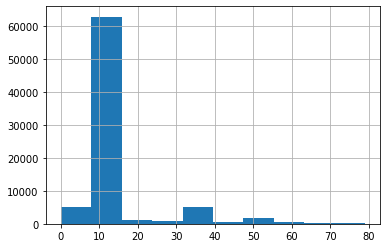

In [78]:
pd.Series(pred).hist()

Судя по гистограмме распределения полученных классов, проблема переобучения на 12ом оквэде все еще остается актуальной и портит качество классификации.

Исходя из этого, методы ресэмплинга и взвешивания классов все еще остаются актуальными в рамках данной задачи, однако это требует построения более сложной архитектуры стекинга, так как разные модели будут вынуждены обучаться на данных разной размерности, что затрудняет использование единой модели на следующем уровне и требует дополнительных временных затрат для тюнинга

### Что можно сделать еще для лучшей классификации?

+ Использовать нейросети, проробовать LSTM на классификации временных рядов с сохранением недельной дискретности
+ Настроить аргумент "class_weight" в xgboost, по идее этот параметр должен компесировать дисбаланс классов
+ Более продвинутый feature enjeneering (уделить больше времени этому важнейшему этапу анализа данных)
+ Использование других методов отбора факторов, их комбинация (shap остался не опробован)
+ Больше внимания аномалиям, комбинация методов фильтрации выбросов
+ Применение продвинутых методов кластерного анализа для генерации дополнительных признаков и выделения подгрупп, отраслей